<a href="https://colab.research.google.com/github/luthfiah22/MachineLearning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LUTHFIAH TUTI AMALIA (SC61715)**

**ASSIGNMENT 3 : MACHINE LEARNING**

# **ASSIGNMENT 2 : DATA PREPOCESSING**

# **Data Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Dataset

In [ ]:
# import dataset
# download it here: https://drive.google.com/file/d/13LzR8frHF4y5b7ogVw9DnDMHXiURsYRc/view?usp=sharing
dataset = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [ ]:
# mengecek tipe data
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# melihat cuplikan dataset
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# statistika deskriptif
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# menghitung berapa kali nilai 0 (no disease) dan nilai 1 (disease) muncul dalam kolom 'target'
counts = dataset['target'].value_counts()

print("0 (no disease):", counts[0])
print("1 (disease):", counts[1])

0 (no disease): 499
1 (disease): 526


## Check Missing Value

In [ ]:
# checking for missing values
dataset.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# checking the number of missing data
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

Setelah dilakukan pengecekan missing value, ternyata tidak ditemukan missing value pada dataset heart disease sehingga dapat dilanjutkan untuk pengecekan selanjutnya.

## Check Duplicate Value

In [ ]:
# check duplicate values
dataset[dataset.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
dataset[dataset.duplicated(keep=False)].any()

age         True
sex         True
cp          True
trestbps    True
chol        True
fbs         True
restecg     True
thalach     True
exang       True
oldpeak     True
slope       True
ca          True
thal        True
target      True
dtype: bool

In [ ]:
dataset.duplicated().sum()

723

Setelah dilakukan pengecekan duplicate value, ternyata ditemukan bahwa terdapat duplicate value pada dataset heart disease sebanyak 723 duplicate. Pada setiap data ditemukan duplicate value sehingga pada 14 variabel ini ada duplicate valuenya. Dikarenakan terdapat duplicate value sebanyak 723 maka langkah selanjutnya adalah dilakukan handling duplicate value untuk mengatasi duplicate value yang banyak pada dataset heart disease.

### Handling Duplicate Value

In [ ]:
# jumlah duplicate value sebelum penghapusan
dataset.duplicated().sum()

723

In [ ]:
# dropping duplicate values
dataset = dataset.drop_duplicates()
dataset = dataset.reset_index(drop = True)
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
# jumlah duplicate value setelah penghapusan
dataset.duplicated().sum()

0

In [ ]:
dataset.duplicated = dataset.drop_duplicates()
dataset.duplicated = dataset.reset_index(drop = True)
print(dataset.duplicated)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   68    0   2       120   211    0        0      115      0      1.5   
298   44    0   2       108   141    0        1      175      0      0.6   
299   52    1   0       128   255    0        1      161      1      0.0   
300   59    1   3       160   273    0        0      125      0      0.0   
301   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

Cara yang dilakukan untuk handling duplicate value adalah dilakukan penghapusan pada 723 duplicate value untuk menangani nilai yang duplicate. Pada penghapusan duplicate value ini jika ada dua atau lebih baris yang sama persis, baris-baris tambahan akan dihapus, dan hanya satu baris pertama yang akan dipertahankan. Lalu hasilnya akan disimpan kembali dalam variabel 'dataset'. Setelah penghapusan nilai duplicate, dengan drop = True, indeks yang lama akan dihapus dan indeks baru akan dibuat secara berurutan mulai dari 0. Hal ini berguna untuk menyusun ulang indeks setelah penghapusan baris, sehingga indeksnya tetap konsisten. Jadi, yang diharapkan setelah dilakukan penghapusan duplicate value ini maka dataset akan menjadi lebih akurat, konsisten, dan efisien. Setelah dilakukan penghapusan duplicate value, data yang awalnya berjumlah 1025 baris sekarang tersisa 302 baris.

## Check Outlier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kolom_kolom = ['age', 'trestbps','chol', 'thalach', 'oldpeak']

batas_kolom = {}

Pengecekan outlier hanya pada dataset continuous atau disebut variabel numerikal karena terkait dengan data numerik yang ekstrem dalam distribusi. Oleh karena itu, pada dataset ini hanya dipilih variabel yang termasuk dalam variabel numerikal. Ditemukan bahwa terdapat 5 variabel numerikal yaitu age, trestbps, chol, thalach, dan oldpeak yang selanjutnya akan dilakukan pengecekan outlier.

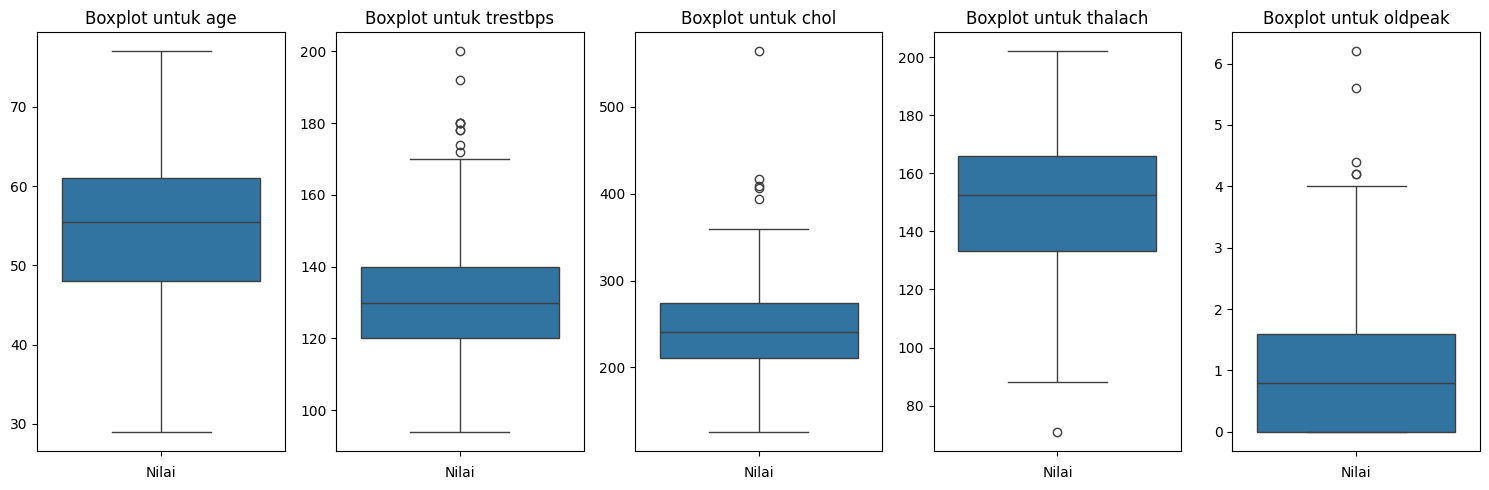

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(kolom_kolom), figsize=(15, 5))

for i, kolom in enumerate(kolom_kolom):
    sns.boxplot(y=dataset[kolom], ax=axes[i])
    axes[i].set_title(f'Boxplot untuk {kolom}')
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Dilihat dari visualisasi boxplot, hanya ada satu variabel yang tidak memiliki outlier yaitu variabel age. Empat variabel lainnya masing-masing memiliki outlier.

In [ ]:
for kolom in kolom_kolom:
    Q1 = dataset[kolom].quantile(0.25)
    Q3 = dataset[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    batas_kolom[kolom] = (lower_bound, upper_bound)

outliers = {}
for kolom in kolom_kolom:
    lower_bound, upper_bound = batas_kolom[kolom]
    outliers[kolom] = dataset[(dataset[kolom] < lower_bound) | (dataset[kolom] > upper_bound)]

In [ ]:
for kolom, (lower_bound, upper_bound) in batas_kolom.items():
    print(f"Kolom '{kolom}':")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print()

Kolom 'age':
Lower Bound: 28.5
Upper Bound: 80.5

Kolom 'trestbps':
Lower Bound: 90.0
Upper Bound: 170.0

Kolom 'chol':
Lower Bound: 115.375
Upper Bound: 370.375

Kolom 'thalach':
Lower Bound: 84.125
Upper Bound: 215.125

Kolom 'oldpeak':
Lower Bound: -2.4000000000000004
Upper Bound: 4.0



### Outlier Variabel Age

In [ ]:
print(f"Outliers pada kolom 'age':")
outliers['age']

Outliers pada kolom 'age':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Pada variabel age tidak ditemukan outlier sehingga dapat dilanjutkan untuk pengecekan selanjutnya.

### Outlier Variabel Trestbps

In [ ]:
print(f"Outliers pada kolom 'trestbps':")
outliers['trestbps']

Outliers pada kolom 'trestbps':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
44,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
76,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
112,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
124,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
142,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
226,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
248,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
271,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


Pada variabel trestbps terdapat outlier yang selanjutnya dapat dilakukan handling outlier. Pada variabel ini terdapat 9 baris yang memiliki outlier.

### Outlier Variabel Chol

In [ ]:
print(f"Outliers pada kolom 'chol':")
outliers['chol']

Outliers pada kolom 'chol':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
104,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
128,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
144,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
183,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
260,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


Pada variabel chol terdapat outlier yang selanjutnya dapat dilakukan handling outlier. Pada variabel ini terdapat 5 baris yang memiliki outlier. Yaitu pada baris 104 dengan kolesterol 417 mg/dl, baris 128 dengan kolesterol 564 mg/dl, baris 144 dengan kolesterol 409 mg/dl, baris 183 dengan kolesterol 394 mg/dl, dan baris 260 dengan kolesterol 407 mg/dl.

### Outlier Variabel Thalach

In [ ]:
print(f"Outliers pada kolom 'thalach':")
outliers['thalach']

Outliers pada kolom 'thalach':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
188,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


Pada variabel thalach terdapat outlier yang selanjutnya dapat dilakukan handling outlier.Pada variabel thalach hanya terdapat 1 baris outlier. Yaitu pada baris 188 dengan detak jantung maksimum yang tercapai adalah 71 denyut per menit.

### Outlier Variabel Oldpeak

In [ ]:
print(f"Outliers pada kolom 'oldpeak':")
outliers['oldpeak']

Outliers pada kolom 'oldpeak':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
51,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
63,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
271,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


Pada variabel oldpeak terdapat outlier yang selanjutnya dapat dilakukan handling outlier. Pada variabel oldpeak terdapat 5 baris outlier. Yaitu pada baris 6, 13, 51, 63, dan 271. Dengan segmen ST 4.4, 4.2, 5.6, 6.2, dan 4.2.

## Handling Outlier

### Handling Outlier Variabel Trestbps

In [ ]:
import numpy as np

Q1 = np.percentile(dataset['trestbps'], 25)
Q3 = np.percentile(dataset['trestbps'], 75)
IQR = Q3 - Q1

LL_trestbps = dataset['trestbps'] <= (Q1-1.5*IQR)
UL_trestbps = dataset['trestbps'] >= (Q3+1.5*IQR)

In [ ]:
dataset[LL_trestbps]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
dataset[UL_trestbps]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
44,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
59,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
64,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
76,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
111,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
112,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
124,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
142,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
159,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1


In [ ]:
cleandata_trest = dataset[~LL_trestbps & ~UL_trestbps]
cleandata_trest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


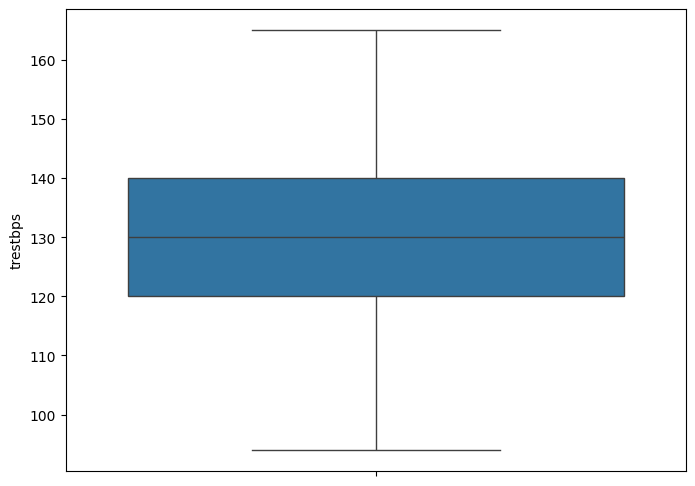

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleandata_trest['trestbps'])
plt.show()

Outlier pada variabel trestbps telah diatasi dengan cara menghapus baris yang dianggap sebagai outlier dari dataset. Sehingga menghasilkan boxplot diatas.

### Handling Outlier Variabel Chol

In [ ]:
Q1 = np.percentile(dataset['chol'], 25)
Q3 = np.percentile(dataset['chol'], 75)
IQR = Q3 - Q1

LL_chol = dataset['chol'] <= (Q1-1.5*IQR)
UL_chol = dataset['chol'] >= (Q3+1.5*IQR)

In [ ]:
dataset[LL_chol]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
dataset[UL_chol]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
104,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
128,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
144,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
183,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
260,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [ ]:
cleandata_chol = cleandata_trest[~LL_chol & ~UL_chol]
cleandata_chol

<ipython-input-36-dae52880fb2b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleandata_chol = cleandata_trest[~LL_chol & ~UL_chol]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


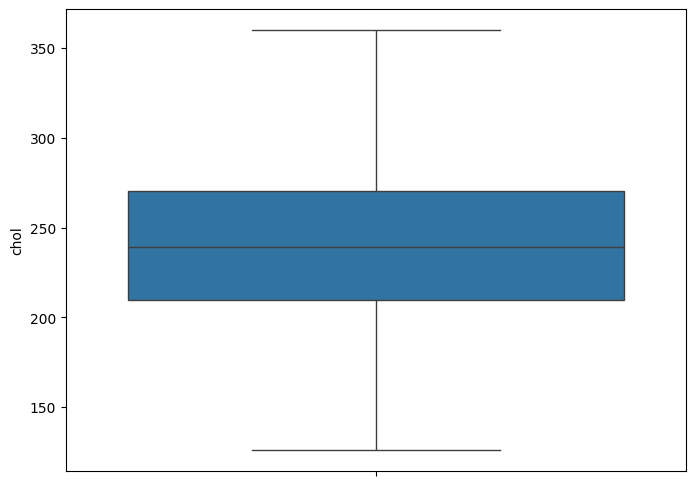

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data = cleandata_chol['chol'])
plt.show()

Outlier pada variabel chol telah diatasi dengan cara menghapus baris yang dianggap sebagai outlier dari dataset. Sehingga menghasilkan boxplot diatas.

### Handling Outlier Variabel Thalach

In [ ]:
Q1 = np.percentile(dataset['thalach'], 25)
Q3 = np.percentile(dataset['thalach'], 75)
IQR = Q3 - Q1

LL_thalach = dataset['thalach'] <= (Q1-1.5*IQR)
UL_thalach = dataset['thalach'] >= (Q3+1.5*IQR)

In [ ]:
dataset[LL_thalach]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
188,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
dataset[UL_thalach]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
cleandata_thalach = cleandata_chol[~LL_thalach & ~UL_thalach]
cleandata_thalach

<ipython-input-41-6824428be8f6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleandata_thalach = cleandata_chol[~LL_thalach & ~UL_thalach]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


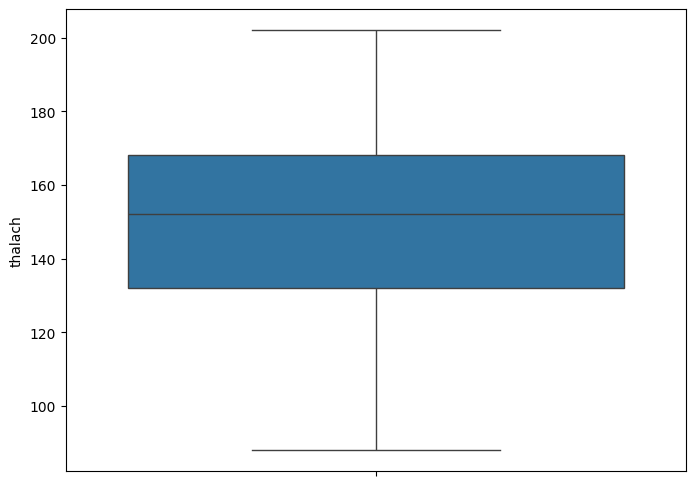

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = cleandata_thalach['thalach'])
plt.show()

Outlier pada variabel thalach telah diatasi dengan cara menghapus baris yang dianggap sebagai outlier dari dataset. Sehingga menghasilkan boxplot diatas.

### Handling Outlier Variabel Oldpeak

In [ ]:
Q1 = np.percentile(dataset['oldpeak'], 25)
Q3 = np.percentile(dataset['oldpeak'], 75)
IQR = Q3 - Q1

LL_oldpeak = dataset['oldpeak'] <= (Q1-1.5*IQR)
UL_oldpeak = dataset['oldpeak'] >= (Q3+1.5*IQR)

In [ ]:
dataset[LL_oldpeak]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
dataset[UL_oldpeak]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
51,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
63,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
71,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
142,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
260,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
271,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [ ]:
cleandata_oldpeak = cleandata_thalach[~LL_oldpeak & ~UL_oldpeak]
cleandata_oldpeak

<ipython-input-46-1cd2851c8c6d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleandata_oldpeak = cleandata_thalach[~LL_oldpeak & ~UL_oldpeak]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


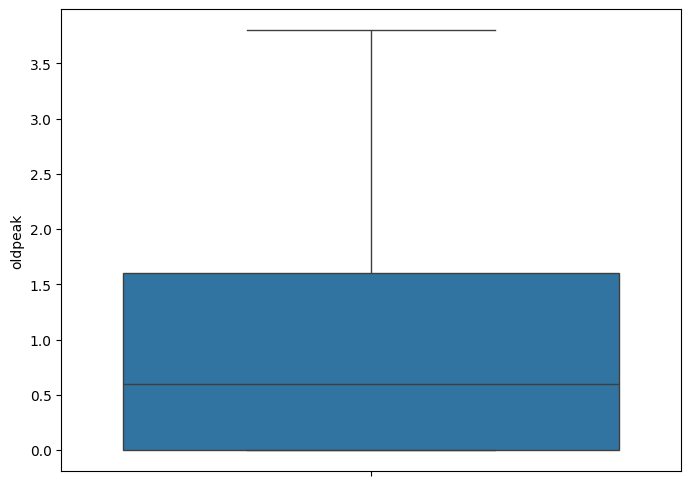

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = cleandata_oldpeak['oldpeak'])
plt.show()

Outlier pada variabel oldpeak telah diatasi dengan cara menghapus baris yang dianggap sebagai outlier dari dataset. Sehingga menghasilkan boxplot diatas.

In [ ]:
dataset_new = cleandata_oldpeak
dataset_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Handling Outlier Tahap 2

Dilakukan untuk variabel chol dan thalach.

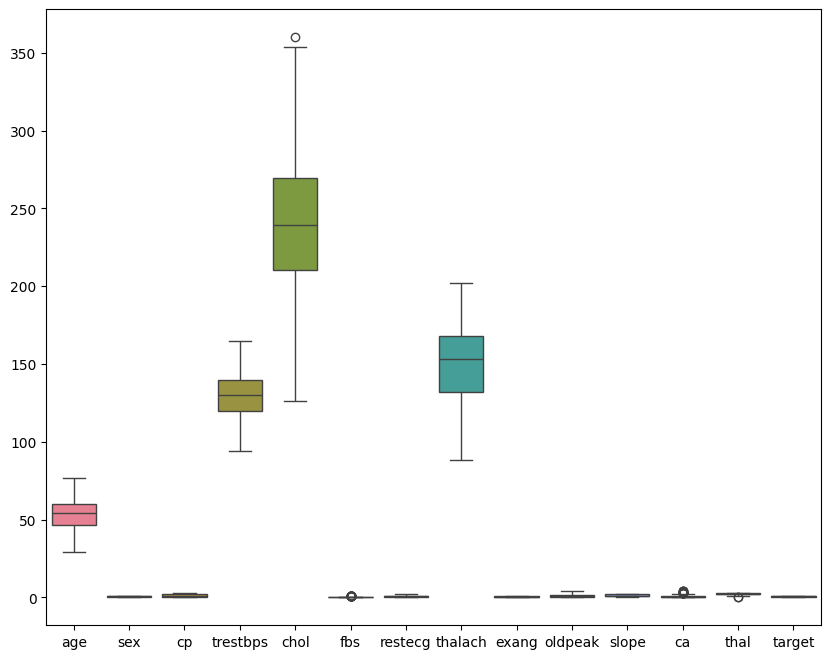

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = dataset_new)
plt.show()

### Handling Outlier Variabel Chol

In [ ]:
Q1 = np.percentile(dataset_new['chol'], 25)
Q3 = np.percentile(dataset_new['chol'], 75)
IQR = Q3 - Q1

LL_chol2 = dataset_new['chol'] <= (Q1-1.5*IQR)
UL_chol2 = dataset_new['chol'] >= (Q3+1.5*IQR)

In [ ]:
dataset_new[UL_chol2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
38,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1


In [ ]:
dataset_new1 = dataset_new[~LL_chol2 & ~UL_chol2]
dataset_new1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Data Final No Outliers

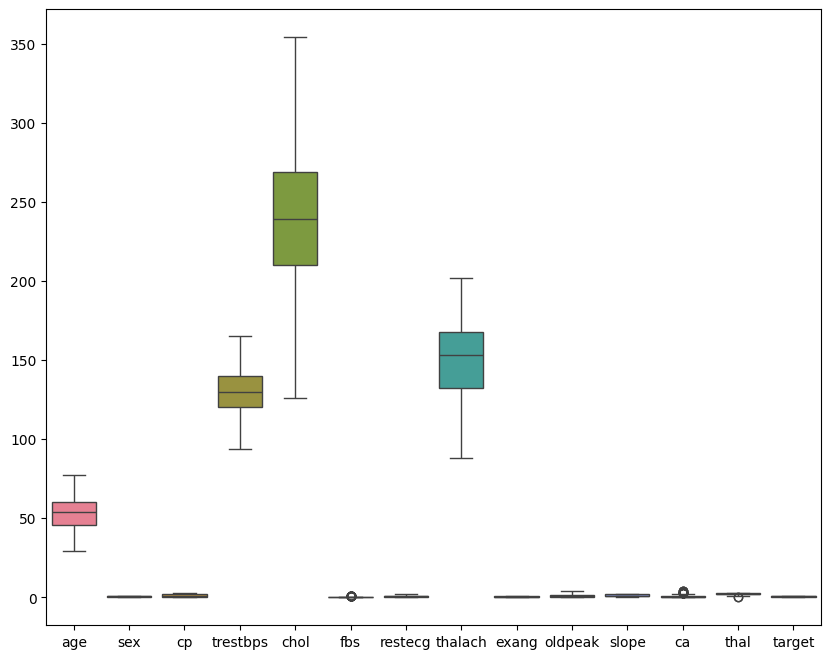

In [ ]:
dataset_final = dataset_new1
dataset_final

plt.figure(figsize=(10, 8))
sns.boxplot(data = dataset_final)
plt.show()

Dilihat dari boxplot diatas bahwa outlier pada variabel chol dan thalach sudah diatasi sehingga sudah tidak ada outlier. Untuk variabel fbs, ca, dan thal tidak dihandling karena variabel tersebut bersifat data kategorikal.

In [ ]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int64  
 1   sex       277 non-null    int64  
 2   cp        277 non-null    int64  
 3   trestbps  277 non-null    int64  
 4   chol      277 non-null    int64  
 5   fbs       277 non-null    int64  
 6   restecg   277 non-null    int64  
 7   thalach   277 non-null    int64  
 8   exang     277 non-null    int64  
 9   oldpeak   277 non-null    float64
 10  slope     277 non-null    int64  
 11  ca        277 non-null    int64  
 12  thal      277 non-null    int64  
 13  target    277 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


Cara yang dilakukan untuk handling outlier adalah menghapus baris yang dianggap sebagai outlier dari dataset. Yaitu melakukan iterasi melalui setiap kolom, lalu mengidentifikasi outlier dengan menggunakan lower bound dan upper bound yang sudah didapatkan sehingga nantinya akan ditemukan dataset baru yang hanya berisi data tanpa outlier. Setelah dilakukan handling outlier dataset menjadi 277 baris.

## Imbalance data

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
# splitting dataset into independent and dependent variable
X = dataset_final[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = dataset_final['target'].values
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   68    0   2       120   211    0        0      115      0      1.5   
298   44    0   2       108   141    0        1      175      0      0.6   
299   52    1   0       128   255    0        1      161      1      0.0   
300   59    1   3       160   273    0        0      125      0      0.0   
301   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

In [ ]:
print(y)

[0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0
 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0
 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0]


Splitting ini dilakukan untuk membagi dataset menjadi dua kelompok variabel yaitu variabel X dan variabel y. Yang termasuk variabel  yaitu age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, dan thal. Sedangkan untuk variabel y yaitu target.


In [ ]:
# sumarize class distribution
counter = Counter(y)
print(counter)

Counter({1: 156, 0: 121})


Distribusi kelas menunjukkan jumlah kemunculan setiap kelas dalam dataset. Pada angka 1 menunjukkan jumlah kemunculan kelas pertama yaitu kelas disease. Sedangkan angka 0 menunjukkan jumlah kemunculan kelas kedua yaitu kelas no disease. Jadi, dalam dataset ini, terdapat 156 sampel yang termasuk dalam kelas pertama (disease) dan 121 sampel yang termasuk dalam kelas kedua (no disease). Ini memberikan gambaran tentang seimbang atau tidaknya distribusi kelas dalam dataset. Dalam kasus ini, terdapat sedikit lebih banyak sampel dari kelas pertama (disease) daripada kelas kedua (no disease). Sehingga distribusi kelas tidak merata atau tidak seimbang karena lebih bayak kelas disease atau dalam arti lebih banyak pasien yang terkena penyakit jantung. Oleh karena itu, langkah selanjutnya diperlukan teknik untuk menangani oversampling yaitu dengan SMOTE untuk menangani ketidakseimbangan kelas dalam dataset.







In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

# check predictor variable
print(X)

Counter({0: 156, 1: 156})
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0     52    1   0       125   212    0        1      168      0  1.000000   
1     53    1   0       140   203    1        0      155      1  3.100000   
2     70    1   0       145   174    0        1      125      1  2.600000   
3     61    1   0       148   203    0        1      161      0  0.000000   
4     62    0   0       138   294    1        1      106      0  1.900000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
307   60    0   0       145   262    0        0      158      0  3.017161   
308   48    1   1       120   186    0        1      139      0  2.063278   
309   64    1   1       146   209    0        0      144      0  1.327516   
310   43    1   0       147   226    0        1      174      0  0.203061   
311   67    1   2       138   254    0        0      145      0  1.834221   

     slope  ca  thal  
0        2   2     3  
1  

In [ ]:
# informasi tentang target
print("Informasi tentang target:")
print("Disease :", [1])
print("No Disease :", [0])

Informasi tentang target:
Disease : [1]
No Disease : [0]


In [ ]:
status = ["Disease", "No Disease"]
prop_val =[0.5,0.5]

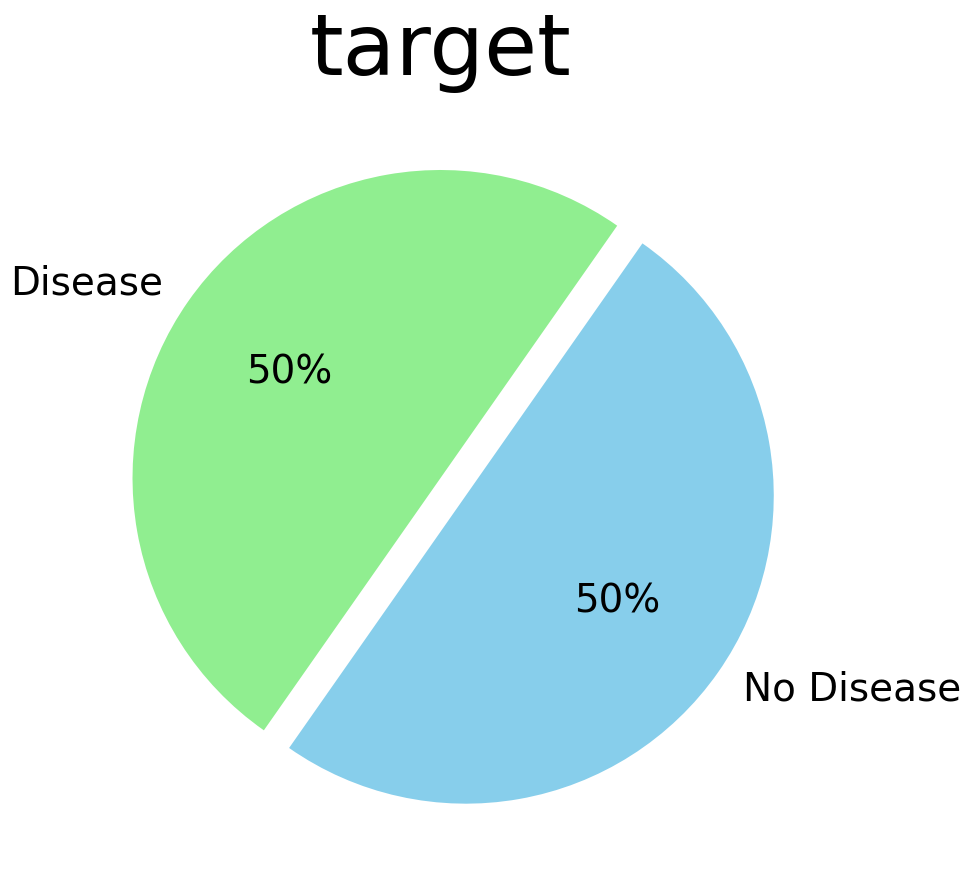

In [ ]:
# data to plot
plt.subplots(figsize = (15,10))
labels = status
sizes = prop_val
colors = ['lightgreen','skyblue']
explode = (0,0.1)

# plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.0f%%', shadow=False, startangle=55, textprops={'fontsize': 28})

plt.title('target', fontsize=62)
plt.show()

Setelah dilakukan teknik oversampling dengan SMOTE maka menghasilkan dataset baru yang telah dioversample, sehingga jumlah sampel dari setiap kelas menjadi seimbang. Seperti pada visualisasi diagram lingkaran diatas, distribusi kelas disease dan no disease telah menjadi seimbang atau sama rata sehingga model dapat mempelajari pola dari kedua kelas dengan lebih baik dan menghasilkan prediksi yang lebih akurat.

## Feature Encoding

Tidak perlu melakukan feature encoding karena dataset sudah dalam bentuk yang sesuai dan tidak memerlukan transformasi tambahan, sehingga langkah untuk feature encoding ini tidak diperlukan atau dapat diabaikan. Pada dataset ini untuk variabel kategorik sudah diformat menjadi numerik seperti pada variabel target yaitu untuk disease sudah di format dengan variabel numerik yaitu 1 dan no disease adalah 0. Oleh karena itu, tidak memerlukan feature encoding.

# **Exploratory Data Analysis (EDA)**


## Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
# informasi dataset
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int64  
 1   sex       277 non-null    int64  
 2   cp        277 non-null    int64  
 3   trestbps  277 non-null    int64  
 4   chol      277 non-null    int64  
 5   fbs       277 non-null    int64  
 6   restecg   277 non-null    int64  
 7   thalach   277 non-null    int64  
 8   exang     277 non-null    int64  
 9   oldpeak   277 non-null    float64
 10  slope     277 non-null    int64  
 11  ca        277 non-null    int64  
 12  thal      277 non-null    int64  
 13  target    277 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


Dataset memiliki tipe data yang sama yaitu numerik yang terdiri dari integer dan float.

In [ ]:
# categorical the features as nominal, ordinal, or numerical
features = {'age': 'numerical',
            'sex': 'nominal',
            'chest pain type': 'nominal',
            'resting blood pressure': 'numerical',
            'serum cholestoral': 'numerical',
            'fasting blood sugar': 'numerical',
            'resting electrocardiographic results': 'nominal',
            'maximum heart rate achieved': 'numerical',
            'exercise induced angina': 'nominal',
            'ST depression induced by exercise relative to rest': 'numerical',
            'the slope of the peak exercise ST segment': 'nominal',
            'number of major vessels colored by flourosopy': 'numerical',
            'thalassemia': 'nominal',
            'target': 'numerical'}

# display the categorized features
print(features)

{'age': 'numerical', 'sex': 'nominal', 'chest pain type': 'nominal', 'resting blood pressure': 'numerical', 'serum cholestoral': 'numerical', 'fasting blood sugar': 'numerical', 'resting electrocardiographic results': 'nominal', 'maximum heart rate achieved': 'numerical', 'exercise induced angina': 'nominal', 'ST depression induced by exercise relative to rest': 'numerical', 'the slope of the peak exercise ST segment': 'nominal', 'number of major vessels colored by flourosopy': 'numerical', 'thalassemia': 'nominal', 'target': 'numerical'}


Ditemukan variabel yang termasuk tipe data numerical adalah age, resting blood preasure, serum cholestoral, fasting blood sugar, max hear rate achieved, St depression, number of major vessels, dan target. Sedangkan variabel yang termasuk tipe data nominal adalah sex, chest pain type, resting electrocardiographic results, exercise induced angina, the slope of the peak exercise ST segment, dan thalassemia. Untuk variabel dengan tipe data ordinal tidak ada.

## Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

In [ ]:
# kolom-kolom yang ingin dihitung  mean, median, dan modus
kolom_to_agg = ['age', 'trestbps','chol', 'thalach', 'oldpeak']

In [ ]:
dataset_final[kolom_to_agg].agg(['mean', 'median', lambda x: x.mode().iloc[0]])

,age,trestbps,chol,thalach,oldpeak
mean,53.891697,129.158845,241.740072,149.978339,0.929964
median,54.000000,130.000000,239.000000,153.000000,0.600000
<lambda>,57.000000,120.000000,197.000000,162.000000,0.000000


**Kondisi Penggunaan Mean :**

Mean atau rata-rata adalah titik di mana distribusi berada dalam keseimbangan. Jika distribusi data simetris, maka mean adalah pengukuran pusat yang baik karena akan mencerminkan nilai tengah dari data. Mean sensitif terhadap outlier, sehingga outlier dapat mempengaruhi nilai mean secara signifikan. Mean  biasanya digunakan untuk tipe data numerik.
Pada variabel age untuk rata-rata usia yang terkena penyakit jantung adalah 53 tahun. Untuk tekanan darah istirahat atau trestbps rata-rata adalah 129 mm Hg. Kolesterol yang dimiliki pasien rata-rata 242 mg/dl. Rata-rata detak jantung maksimum tercapai adalah 150 denyut per menit. Rata-rata depresi ST disebabkan oleh olahraga adalah 0.9 dalam segmen ST.

**Kondisi Penggunaan Median :**

Median adalah titik tengah distribusi dimana jumlah nilai yang berada di atas
median sama seperti di bawahnya. Titik tengah adalah nilai tengah yang diukur
dari nilai terendah hingga nilai tertinggi. Median juga dapat dianggap sebagai persentil ke-50. Median cocok digunakan ketika data memiliki distribusi yang miring (skewness) atau ketika ada outlier dalam data. Median cocok digunakan untuk berbagai jenis tipe data, terutama ketika  memiliki data yang memiliki distribusi yang miring (skewed). Pada dataset, usia tengah yang muncul adalah 54 tahun. Tekanan darah istirahat memiliki median 130 mm Hg. Kolesterol 239 mg/dl. Detak jantung maks adalah 153 denyut per menit. Depresi ST 0.6 segmen ST.


**Kondisi Penggunaan Modus :**

Modus adalah nilai yang paling sering muncul di dataset. Jika terdapat
beberapa nilai dengan frekuensi paling sering muncul sama, maka dataset bisa
mempunyai lebih dari 1 modus. Kemudian, jika frekuensi kemunculan semua nilai
pada dataset sama maka tidak ada modus. Modus digunakan untuk data kategorikal. Sedangkan pada dataset ini tidak ada data kategorikal.

## Menemukan dan mendeskripsikan statistical five summaries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# kolom-kolom yang ingin dihitung statistiknya
kolom_to_agg = ['age', 'trestbps','chol', 'thalach', 'oldpeak']

In [ ]:
dataset_final[kolom_to_agg].describe()

,age,trestbps,chol,thalach,oldpeak
count,277.000000,277.000000,277.000000,277.000000,277.000000
mean,53.891697,129.158845,241.740072,149.978339,0.929964
std,9.153828,14.643222,44.055354,22.916505,1.002788
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,46.000000,120.000000,210.000000,132.000000,0.000000
50%,54.000000,130.000000,239.000000,153.000000,0.600000
75%,60.000000,140.000000,269.000000,168.000000,1.600000
max,77.000000,165.000000,354.000000,202.000000,3.800000


Statistical five summaries adalah sekumpulan statistik deskriptif yang digunakan untuk memberikan gambaran ringkas tentang distribusi data. Terdapat 5 fitur statistik yaitu :

1. Minimum: Nilai terendah dalam kumpulan data.

2. Kuartil Pertama (Q1) : Nilai di mana 25% dari data berada di bawahnya. Ini juga dikenal sebagai kuartil bawah.

3. Median (Kuartil Kedua atau Q2) : Nilai tengah dalam kumpulan data. Ini adalah nilai di mana 50% dari data berada di bawahnya.

4. Kuartil Ketiga (Q3) : Nilai di mana 75% dari data berada di bawahnya. Ini juga dikenal sebagai kuartil atas.

5. Maksimum : Nilai tertinggi dalam kumpulan data.


In [ ]:
dataset_final[kolom_to_agg].describe().loc[['min', '25%', '50%', '75%', 'max']]

,age,trestbps,chol,thalach,oldpeak
min,29.0,94.0,126.0,88.0,0.0
25%,46.0,120.0,210.0,132.0,0.0
50%,54.0,130.0,239.0,153.0,0.6
75%,60.0,140.0,269.0,168.0,1.6
max,77.0,165.0,354.0,202.0,3.8


**Jelaskan keadaan dari usia pasien pada variabel age!**

**Penjelasan dapat dilihat melalui statistik deskriptif.**

Pasien yang memiliki riwayat penyakit jantung tersebar dari mulai usia 29 tahun sampai dengan 77 tahun. Jadi, penyakit jantung tidak hanya dimiliki oleh individu dengan usia tua tetapi usia muda juga dapat terkena risiko penyakit jantung. Dataset sebaran usia lebih banyak menyebar di sekitar nilai maksimum (left skewed/negative skewed) jika dilihat dari nilai mean < mediannya. Mean (53) < median (54).



**Jelaskan keadaan dari tekanan darah istirahat pada variabel trestbps!**

**Penjelasan dapat dilihat melalui statistik deskriptif.**

Tekanan darah pasien saat sedang istirahat menyebar dari 94 mmHg sampai 170 mmHg. Pasien-pasien dengan tekanan darah istirahat yang lebih tinggi, seperti yang mencapai 165 mmHg, mungkin memiliki risiko yang lebih besar terhadap penyakit jantung, stroke, atau hipertensi. Dataset menunjukkan sebaran trestbps lebih banyak menyebar di sekitar nilai maksimum (left skewed/negative skewed) jika dilihat dari nilai mean (129) < median (130). Dengan selisih yang sangat kecil jadi hampir seperti distribusi normal.

**Jelaskan keadaan dari tingkat kolesterol pasien pada variabel chol!**

**Penjelasan dapat dilihat melalui statistik deskriptif.**

Tingkat kolesterol pasien menyebar dari 126 mg/dl sampai 354 mg/dl dengan rata-rata kolesterol yang dimiliki pasien 242 mg/dl. Hal ini menunjukkan bahwa sebagian besar pasien mungkin memiliki tingkat kolesterol yang berada di sekitar rata-rata 242 mg/dL, sementara ada beberapa pasien dengan tingkat kolesterol di atas atau di bawah rata-rata tersebut. Dataset menunjukkan sebaran tingkat kolesterol pasien lebih banyak menyebar di sekitar nilai minimum (right skewed/positive skewed) jika dilihat dari nilai mean (242) > median (239).

**Jelaskan keadaan dari detak jantung maksimum pasien pada variabel thalach!**

**Penjelasan dapat dilihat melalui statistik deskriptif.**

Detak jantung maksimum pasien menyebar dari 88 denyut per menit sampai 202 denyut per menit. Rata-rata detak jantung maksimum yang dimiliki pasien adalah 150 denyut per menit. Dataset menunjukkan sebaran detak jantung maksimum pasien lebih banyak menyebar di sekitar nilai maksimum (left skewed/negative skewed) jika dilihat dari nilai mean (150) < median (153).

**Jelaskan keadaan dari depresi ST disebabkan oleh olahraga pada pasien di variabel oldpeak!**

**Penjelasan dapat dilihat melalui statistik deskriptif.**

Tingkat depresi pasien yang disebabkan oleh olahraga menyebar mulai dari 0.0 sampai 3.8. Rata-rata tingkat depresi pasien penyakit jantung adalah 0.9 segmen ST. Dataset menunjukkan tingkat depresi pasien yang disebabkan oleh olahraga lebih banyak menyebar di sekitar nilai minimum (right skewed/positive skewed) jika dilihat dari nilai mean (0.9) > median (0.6).

## Mendeskripsikan distribusi data

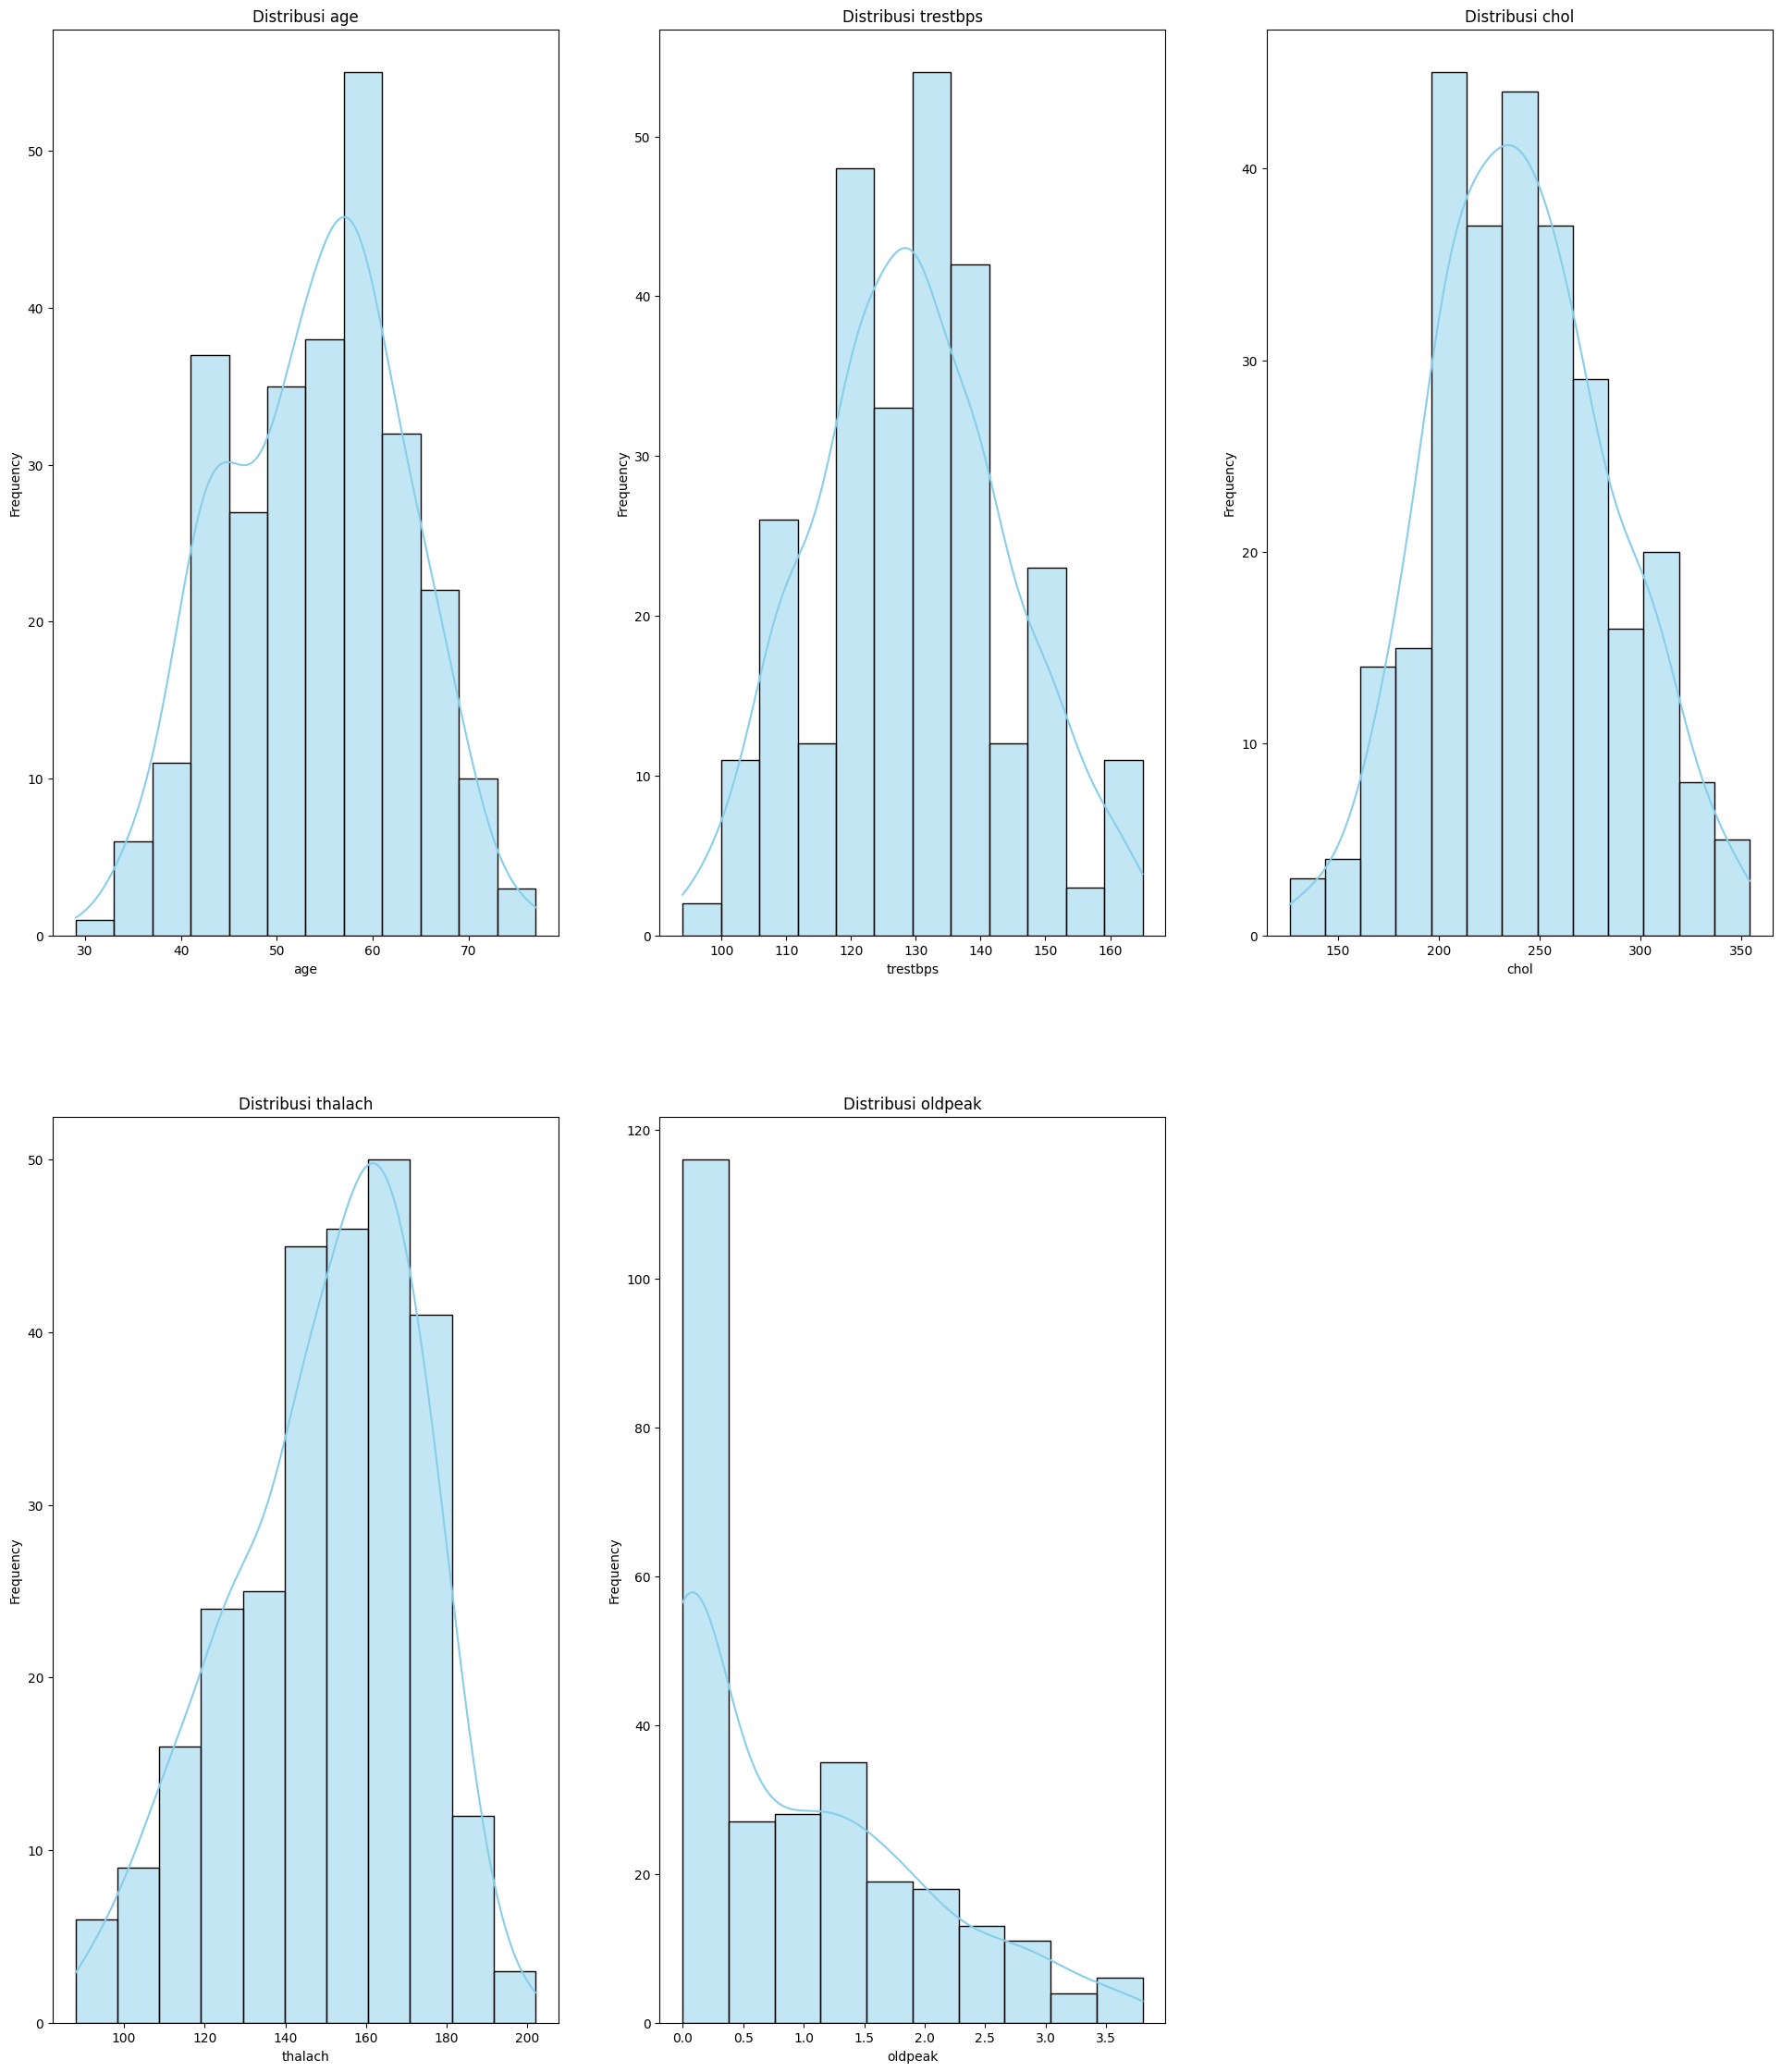

In [ ]:
numeric_kolom = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_plots = len(numeric_kolom)
num_cols = 3
num_rows = num_plots // num_cols
if num_plots % num_cols:
    num_rows += 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, 28))

for i, column in enumerate(numeric_kolom):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.histplot(dataset_final[column], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribusi {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

for i in range(num_plots, num_rows * num_cols):
    plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))

plt.show()

1. Distribusi data **age** menunjukkan bahwa data lebih banyak menyebar di sekitar nilai maksimum (left skewed/negative skewed) jika dilihat dari nilai mean < mediannya. Mean (53) < median (54).
2. Distribusi data **trestbps** menunjukkan bahwa data lebih banyak menyebar di sekitar nilai maksimum (left skewed/negative skewed) jika dilihat dari nilai mean (129) < median (130). Dengan selisih yang sangat kecil jadi hampir seperti distribusi normal.
3. Distribusi data **chol** yaitu menunjukkan sebaran data lebih banyak menyebar di sekitar nilai minimum (right skewed/positive skewed) jika dilihat dari nilai mean (242) > median (239).
4. Distribusi data **thalach** menunjukkan persebaran data menjulur ke kiri atau left skewed, namun hampir terdistribusi dengan normal. Karena data lebih banyak menyebar di sekitar nilai maksimum (left skewed/negative skewed) jika dilihat dari nilai mean (150) < median (153).
5. Distribusi data **oldpeak** menunjukkan data menyebar right skewed atau data menjulur ke kanan dan menunjukkan bahwa ekor distribusi data menunjuk ke arah positif, yaitu dimana banyak data berkumpul di titik minimum data jika dilihat dari nilai mean (0.9) > median (0.6).

**Scatter Plot Usia (Age) Pasien yang Memiliki Penyakit Jantung (Target) berdasarkan Kolesterol (Chol)**




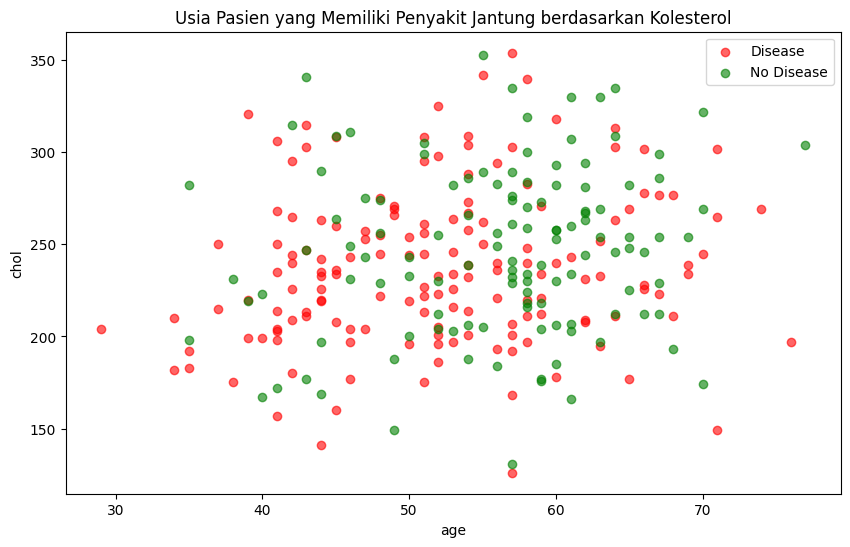

In [ ]:
import matplotlib.pyplot as plt

# filter dataset untuk pasien yang memiliki penyakit jantung dan tidak
patients_with_heart_disease = dataset_final[dataset_final['target'] == 1]
patients_with_no_disease = dataset_final[dataset_final['target'] == 0]

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(patients_with_heart_disease['age'], patients_with_heart_disease['chol'], color='red', alpha=0.6, label='Disease')
plt.scatter(patients_with_no_disease['age'], patients_with_no_disease['chol'], color='green', alpha=0.6, label='No Disease')
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Usia Pasien yang Memiliki Penyakit Jantung berdasarkan Kolesterol')
plt.legend()
plt.show()


Scatter plot adalah salah satu jenis grafik yang digunakan dalam analisis data untuk memvisualisasikan hubungan antara dua variabel. Berdasarkan output diatas, pasien yang memiliki penyakit jantung adalah berwarna merah sedangkan pasien yang tidak memiliki penyakit jantung berwarna hijau. Dilihat dari distribusi data menunjukkan bahwa usia (age) pasien yang memiliki penyakit jantung berdasarkan kolesterol (chol) adalah usia 40 sampai 60 tahun. Dengan tingkat kolesterol rata-rata tersebar secara merata di 0 sampai 350 mm/dl. Hal ini membuktikan bahwa penyakit jantung dapat menyerang di usia dewasa sampai tua. Ditemukan hal menarik bahwa pasien dengan usia diatas 60 tahun jarang yang terkena penyakit jantung.

**Heatmap Correlation**

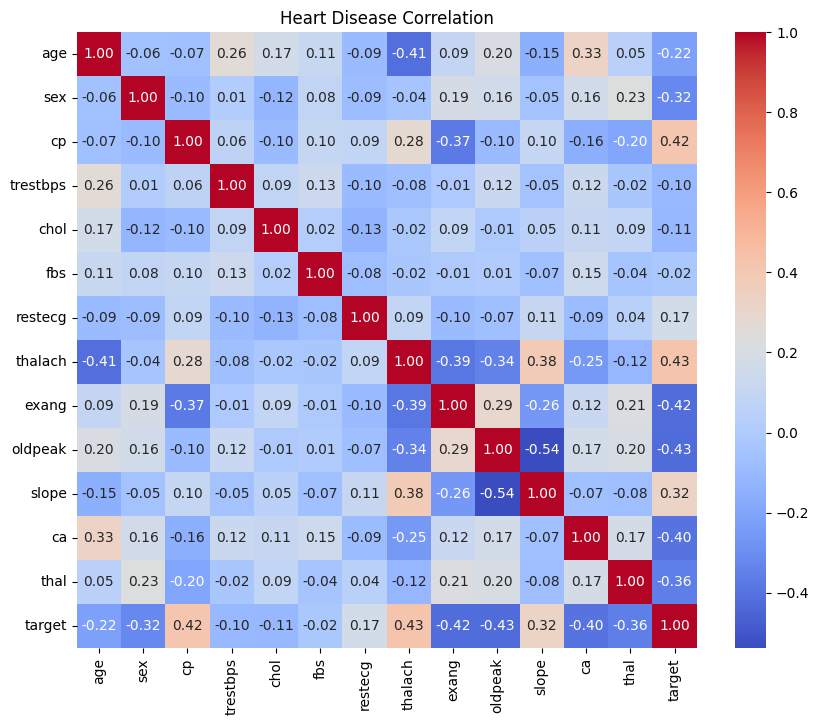

In [ ]:
# menghitung matriks korelasi
correlation_matrix = dataset_final.corr()

# membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heart Disease Correlation')
plt.show()

Heatmap korelasi adalah visualisasi yang berguna untuk memahami korelasi antara dua variabel dalam dataset. Ini digunakan untuk menunjukkan seberapa kuat hubungan antara dua fitur, apakah itu positif (korelasi positif), negatif (korelasi negatif), atau tidak ada korelasi sama sekali. Melalui Heatmap Correlation kita dapat membuktikan scatter plot yang telah dicari sebelumnya dan mengetahui korelasi antar variabel, yaitu :
1.   Berdasarkan heatmap correlation diatas, korelasi antara variabel usia (age) dengan target yaitu -0.22. Hal ini menunjukkan bahwa hubungan antara usia dan target cukup lemah karena nilai korelasi yang mendekati 0. Semakin dekat nilai korelasi ke 0 maka semakin lemah hubungan antara dua variabel. Nilai korelasi yang negatif menunjukkan bahwa saat usia seseorang meningkat maka mereka yang memiliki penyakit jantung cenderung menurun. Dengan kata lain, ada kecenderungan bahwa orang yang lebih muda cenderung memiliki risiko penyakit jantung yang lebih tinggi dibandingkan dengan orang yang lebih tua. Sehingga faktor usia belum tentu mempengaruhi apakah seseorang sakit hantung atau tidak.
2.   Berdasarkan heatmap correlation diatas, korelasi antara variabel kolesterol (chol) dengan variabel target yaitu -0.08. Hal ini menunjukkan bahwa hubungan antara kolesterol dengan penyakit jantung (target) sangat lemah karena nilai korelasi yang mendekati 0. Dengan demikian, tidak dapat diambil kesimpulan yang kuat tentang seberapa besar pengaruh kolesterol terhadap risiko penyakit jantung berdasarkan nilai korelasi ini saja.
3.   Berdasarkan heatmap korelasi di atas, korelasi antara variabel usia (age) dan variabel kolesterol (chol) adalah 0.21. Korelasi sebesar 0.21 menunjukkan bahwa terdapat hubungan positif yang lemah antara usia dan tingkat kolesterol. Meskipun ada hubungan positif antara usia dan kolesterol, korelasi 0.21 menunjukkan bahwa hubungan tersebut cukup lemah untuk dianggap sebagai hubungan yang signifikan secara statistik. Artinya, meskipun tingkat kolesterol mereka serupa, orang-orang tersebut dapat memiliki rentang usia yang berbeda-beda. Ini menunjukkan bahwa usia bukanlah satu-satunya faktor yang memengaruhi tingkat kolesterol, dan ada faktor-faktor lain yang dapat memengaruhi tingkat kolesterol seseorang tanpa memperhatikan usia mereka.






# **Feature Engineering**

## 1. Kategori Usia Paling Banyak Terkena Penyakit Jantung

In [ ]:
import pandas as pd

# menentukan batas-batas kategori usia dan label-labelnya
bins = [29, 40, 50, 60, 70, 77]
labels = ['1', '2', '3', '4', '5']

# menambahkan kolom baru 'age_category' ke dataset_fix berdasarkan kategori usia yang ditentukan
dataset_final['age_category'] = pd.cut(dataset_final['age'], bins=bins, labels=labels)

# menampilkan dataset_fix setelah penambahan kolom 'age_category'
print(dataset_final[['age', 'age_category']])

     age age_category
0     52            3
1     53            3
2     70            4
3     61            4
4     62            4
..   ...          ...
297   68            4
298   44            2
299   52            3
300   59            3
301   54            3

[277 rows x 2 columns]


<ipython-input-75-d79c8173171a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['age_category'] = pd.cut(dataset_final['age'], bins=bins, labels=labels)


In [ ]:
import pandas as pd

# menentukan batas-batas kategori usia dan label-labelnya
bins = [29, 40, 50, 60, 70, 77]
labels = ['1', '2', '3', '4', '5']

# menambahkan kolom baru 'age_category' ke dataset_final berdasarkan kategori usia yang ditentukan
dataset_final['age_category'] = pd.cut(dataset_final['age'], bins=bins, labels=labels)

# menampilkan dataset_final setelah penambahan kolom 'age_category'
print(dataset_final[['age', 'age_category']])

# menghitung berapa kali nilai muncul dalam kolom 'age_category'
counts = dataset_final['age_category'].value_counts()

# mencetak frekuensi kemunculan kategori usia yang sebenarnya ada dalam counts
print("1 (muda):", counts['1'])
print("2 (dewasa):", counts['2'])
print("3 (tua):", counts['3'])
print("4 (sangat tua):", counts['4'])
print("5 (lanjut usia):", counts['5'])

     age age_category
0     52            3
1     53            3
2     70            4
3     61            4
4     62            4
..   ...          ...
297   68            4
298   44            2
299   52            3
300   59            3
301   54            3

[277 rows x 2 columns]
1 (muda): 17
2 (dewasa): 76
3 (tua): 116
4 (sangat tua): 61
5 (lanjut usia): 6


<ipython-input-76-d62ba5eca5d8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['age_category'] = pd.cut(dataset_final['age'], bins=bins, labels=labels)


In [ ]:
# mengelompokkan data berdasarkan kolom 'age_category' dan menghitung jumlah kasus penyakit jantung dalam setiap kelompok usia
heart_disease_counts = dataset_final.groupby(['age_category', 'target']).size().unstack()

# menampilkan kelompok usia dengan jumlah kasus penyakit jantung tertinggi
most_affected_age_group = heart_disease_counts[1].idxmax()

print("Kelompok usia dengan jumlah kasus penyakit jantung tertinggi:", most_affected_age_group)

Kelompok usia dengan jumlah kasus penyakit jantung tertinggi: 3


Kesimpulan :
Berdasarkan fitur baru tersebut, dapat ditarik kesimpulan bahwa rumah sakit dapat mengetahui pasien mana yang harus diprioritaskan karena penyakit jantung. Ditemukan hasil bahwa pasien yang paling banyak terkena penyakit jantung adalah kelompok usia tua dengan kisaran usia 50 tahun sampai 60 tahun yaitu sebanyak 116 pasien.

Recommendation :
Rumah sakit dapat menghadapi tantangan permasalahan mengenai banyaknya kelompok usia tua yang terkena penyakit jantung dengan membuat sosialisasi tentang penyakit jantung kepada warga masyarakat supaya penyakit jantung dapat ditangani lebih dini. Rumah sakit juga dapat mengimplementasikan program pemantauan dan manajemen penyakit jantung bagi pasien kelompok usia tua. Program ini mencakup pemantauan rutin terhadap kondisi kesehatan pasien, pengelolaan obat-obatan secara teratur, dan pendidikan kesehatan untuk meningkatkan pemahaman pasien tentang penyakit jantung.



## 2. Rasio Kolesterol Terhadap Tekanan Darah

In [ ]:
# membuat fitur baru 'chol_trestbps_ratio' sebagai rasio kolesterol terhadap tekanan darah
dataset_final['chol_trestbps_ratio'] = dataset_final['chol'] / dataset_final['trestbps']

print(dataset_final.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target age_category  chol_trestbps_ratio  
0   2     3       0            3             1.696000  
1   0     3       0            3             1.450000  
2   0     3       0            4             1.200000  
3   1     3       0            4             1.371622  
4   3     2       0            4             2.130435  


<ipython-input-78-779ce0fc5cc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['chol_trestbps_ratio'] = dataset_final['chol'] / dataset_final['trestbps']


In [ ]:
# mendefinisikan batasan untuk klasifikasi normal atau abnormal
batas_normal_bawah = 1.5
batas_normal_atas = 3.0

# membuat fungsi untuk mengklasifikasikan rasio sebagai normal atau abnormal
def klasifikasi_ratio(nilai):
    if nilai >= batas_normal_bawah and nilai <= batas_normal_atas:
        return 0  # Normal
    else:
        return 1  # Abnormal

# mengaplikasikan fungsi klasifikasi pada kolom 'chol_trestbps_ratio'
dataset_final['status_ratio'] =dataset_final['chol_trestbps_ratio'].apply(klasifikasi_ratio)

print(dataset_final[['chol_trestbps_ratio', 'status_ratio']])



     chol_trestbps_ratio  status_ratio
0               1.696000             0
1               1.450000             1
2               1.200000             1
3               1.371622             1
4               2.130435             0
..                   ...           ...
297             1.758333             0
298             1.305556             1
299             1.992188             0
300             1.706250             0
301             1.566667             0

[277 rows x 2 columns]


<ipython-input-79-50a19f4af9a9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['status_ratio'] =dataset_final['chol_trestbps_ratio'].apply(klasifikasi_ratio)


In [ ]:
# menampilkan klasifikasi rasio yang paling sering muncul
most_common_classification = dataset_final['status_ratio'].mode()[0]

print("Klasifikasi paling sering muncul:", most_common_classification)

Klasifikasi paling sering muncul: 0


Kesimpulan : Berdasarkan hasil dari fitur baru tersebut, rumah sakit dapat mengetahui rasio kolesterol terhadap tekanan darah itu masuk klasifikasi normal atau tidak normal. Hal ini dapat membuat pekerjaan dokter di rumah sakit menjadi lebih mudah karena sudah mengetahui rasionya. Kesimpulannya, rasio kolesterol pasien terhadap tekanan darahnya mayoritas masih tergolong normal karena berkisar diantara 1.5 mg/dl sampai 3.0 mg/dl.

Recommendation : Setelah diketahui bahwa banyak pasien yang masih memiliki rasio normal maka rumah sakit dapat memberikan pengobatan dan pemantuan terhadap pasien dan bagi pasien yang rasionya abnormal, mungkin rumah sakit dapat memberikan pengobatan dan perawatan yang intensif.


## 3. Detak Jantung Maksimum Relatif Terhadap Usia

In [ ]:
def hitung_detak_jantung_max(usia):
    return 220 - usia

def detak_jantung_target(detak_jantung_max, detak_jantung_istirahat, intensitas):
    return ((detak_jantung_max - detak_jantung_istirahat) * intensitas) + detak_jantung_istirahat

def cek_normal(detak_jantung, detak_jantung_istirahat):
    if detak_jantung_istirahat <= detak_jantung <= detak_jantung_istirahat + 30:
        return "Normal"
    else:
        return "Tidak Normal"

# usia 29-39, detak jantung istirahat 95-170 kali per menit
usia_min = 29
usia_max = 39
detak_jantung_istirahat = 95
intensitas = 0.6  # misalnya, intensitas 60%

print("Detak jantung maksimum relatif terhadap usia 29-39:")
for usia in range(usia_min, usia_max + 1):
    detak_jantung_max = hitung_detak_jantung_max(usia)
    detak_jantung_target_usia = detak_jantung_target(detak_jantung_max, detak_jantung_istirahat, intensitas)
    status = cek_normal(detak_jantung_target_usia, detak_jantung_istirahat)
    print(f"Usia: {usia} tahun, Detak Jantung Target: {detak_jantung_target_usia} per menit, Status: {status}")

# usia 40-59, detak jantung istirahat 85-155 kali per menit
usia_min = 40
usia_max = 59
detak_jantung_istirahat = 85
intensitas = 0.6  # misalnya, intensitas 60%

print("Detak jantung maksimum relatif terhadap usia 40-59:")
for usia in range(usia_min, usia_max + 1):
    detak_jantung_max = hitung_detak_jantung_max(usia)
    detak_jantung_target_usia = detak_jantung_target(detak_jantung_max, detak_jantung_istirahat, intensitas)
    status = cek_normal(detak_jantung_target_usia, detak_jantung_istirahat)
    print(f"Usia: {usia} tahun, Detak Jantung Target: {detak_jantung_target_usia} per menit, Status: {status}")

# usia 60-77, detak jantung istirahat 80-130 kali per menit
usia_min = 60
usia_max = 77
detak_jantung_istirahat = 80
intensitas = 0.6  # misalnya, intensitas 60%

print("Detak jantung maksimum relatif terhadap usia 60-77:")
for usia in range(usia_min, usia_max + 1):
    detak_jantung_max = hitung_detak_jantung_max(usia)
    detak_jantung_target_usia = detak_jantung_target(detak_jantung_max, detak_jantung_istirahat, intensitas)
    status = cek_normal(detak_jantung_target_usia, detak_jantung_istirahat)
    print(f"Usia: {usia} tahun, Detak Jantung Target: {detak_jantung_target_usia} per menit, Status: {status}")



Detak jantung maksimum relatif terhadap usia 29-39:
Usia: 29 tahun, Detak Jantung Target: 152.6 per menit, Status: Tidak Normal
Usia: 30 tahun, Detak Jantung Target: 152.0 per menit, Status: Tidak Normal
Usia: 31 tahun, Detak Jantung Target: 151.4 per menit, Status: Tidak Normal
Usia: 32 tahun, Detak Jantung Target: 150.8 per menit, Status: Tidak Normal
Usia: 33 tahun, Detak Jantung Target: 150.2 per menit, Status: Tidak Normal
Usia: 34 tahun, Detak Jantung Target: 149.6 per menit, Status: Tidak Normal
Usia: 35 tahun, Detak Jantung Target: 149.0 per menit, Status: Tidak Normal
Usia: 36 tahun, Detak Jantung Target: 148.4 per menit, Status: Tidak Normal
Usia: 37 tahun, Detak Jantung Target: 147.8 per menit, Status: Tidak Normal
Usia: 38 tahun, Detak Jantung Target: 147.2 per menit, Status: Tidak Normal
Usia: 39 tahun, Detak Jantung Target: 146.6 per menit, Status: Tidak Normal
Detak jantung maksimum relatif terhadap usia 40-59:
Usia: 40 tahun, Detak Jantung Target: 142.0 per menit, Statu

In [ ]:
# membuat fitur baru 'thalach_relative_to_age' sebagai detak jantung maksimum relatif terhadap usia
dataset_final['thalach_relative_to_age'] = dataset_final['thalach'] / dataset_final['age']

print(dataset_final.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target age_category  chol_trestbps_ratio  status_ratio  \
0   2     3       0            3             1.696000             0   
1   0     3       0            3             1.450000             1   
2   0     3       0            4             1.200000             1   
3   1     3       0            4             1.371622             1   
4   3     2       0            4             2.130435             0   

   thalach_relative_to_age  
0                 3.230769  
1                 2.924528  

<ipython-input-82-575ca71f6021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['thalach_relative_to_age'] = dataset_final['thalach'] / dataset_final['age']


Kesimpulan : Berdasarkan hasil dari fitur baru tersebut, dokter dapat mengetahui gambaran tentang seberapa baik seseorang dalam menjaga kesehatan jantungnya seiring bertambahnya usia. Semakin normal detak jantungnya maka pasien semakin baik dalam menjaga kesehatan jantungnya. Detak jantung maksimum relatif terhadap usia cenderung menurun seiring bertambahnya usia. Hal ini disebabkan oleh berbagai faktor, termasuk penurunan massa otot jantung, elastisitas pembuluh darah, dan kapasitas paru-paru seiring bertambahnya usia. Pada fitur baru ini menunjukkan bahwa pasien memiliki detak jantung yang tidak normal, karena seperti misalnya pasien usia 52 tahun memiliki detak jantung 3.2 kali dari rasio normal 85-155 kali per menit.

Recommendation : Pihak rumah sakit dapat memberikan sosialisasi dan manajemen penyakit jantung terhadap pasien yang tidak menjaga kesehatan jantungnya dengan baik.

## 4. Pengaruh Usia Terhadap Depresi yang Disebabkan Oleh Olahraga

In [ ]:
# menambahkan kolom baru 'Pengaruh Usia Terhadap Depresi yang Disebabkan Oleh Olahraga'
dataset_final['age_exang'] = dataset_final['age'] * dataset_final['exang']

print(dataset_final)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   68    0   2       120   211    0        0      115      0      1.5   
298   44    0   2       108   141    0        1      175      0      0.6   
299   52    1   0       128   255    0        1      161      1      0.0   
300   59    1   3       160   273    0        0      125      0      0.0   
301   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target age_category  chol_trestbps_ratio  status_ratio  \
0      

<ipython-input-83-92f0c77d560f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['age_exang'] = dataset_final['age'] * dataset_final['exang']


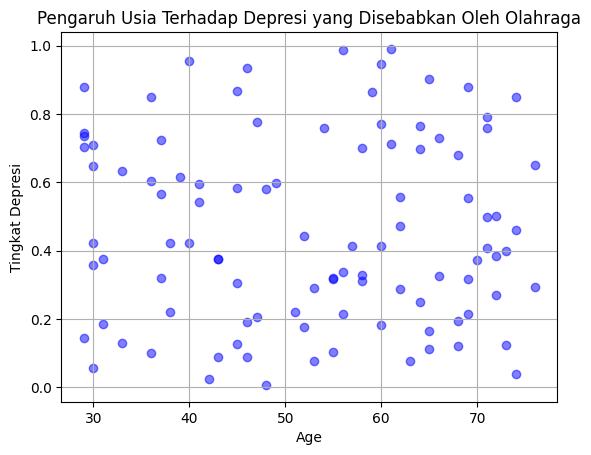

In [ ]:
# data usia
age = np.random.randint(29, 77, size=100)

# tingkat depresi yang disebabkan oleh olahraga
tingkat_depresi = np.random.uniform(0, 1, size=100)

# plotting data
plt.scatter(age, tingkat_depresi, color='blue', alpha=0.5)
plt.title('Pengaruh Usia Terhadap Depresi yang Disebabkan Oleh Olahraga')
plt.xlabel('Age')
plt.ylabel('Tingkat Depresi')
plt.grid(True)
plt.show()

Kesimpulan : Dapat disimpulkan bahwa kelompok usia yang paling banyak depresi karena olahraga adalah di kisaran usia 30 sampai 55 tahun. Oleh karena itu, pasien penyakit jantung banyak berkisaran diusia 40 tahunan karena pengaruh usia terhadap depresi yang disebabkan oleh olahraga.

Recommendation : Untuk mengatasi masalah tersebut, rumah sakit atau pekerja kesehatan dapat membuat sosialisasi tentang manfaat dalam berolahraga yang dapat berguna untuk meminimalisir terkena penyakit jantung.

## 5. Normalisasi Tingkat Kolesterol

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# membuat objek scaler Min-Max
scaler = MinMaxScaler()

# melakukan normalisasi pada fitur 'chol'
dataset_final['chol_normalized'] = scaler.fit_transform(dataset_final[['chol']])

print(dataset_final[['chol', 'chol_normalized']].head())

   chol  chol_normalized
0   212         0.377193
1   203         0.337719
2   174         0.210526
3   203         0.337719
4   294         0.736842


<ipython-input-85-0b7052051ba0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['chol_normalized'] = scaler.fit_transform(dataset_final[['chol']])


In [ ]:
# menghitung jumlah data dengan tingkat kolesterol dalam rentang normal
jumlah_normal = len(dataset_final[(dataset_final['chol'] < 200)])

# menghitung jumlah data dengan tingkat kolesterol dalam rentang batas tinggi
jumlah_batas_tinggi = len(dataset_final[(dataset_final['chol'] >= 200) & (dataset_final['chol'] <= 239)])

# menghitung jumlah data dengan tingkat kolesterol tinggi
jumlah_tinggi = len(dataset_final[(dataset_final['chol'] >= 240)])

print("Jumlah data dengan tingkat kolesterol:")
print(f"- Normal: {jumlah_normal} data")
print(f"- Batas Tinggi: {jumlah_batas_tinggi} data")
print(f"- Tinggi: {jumlah_tinggi} data")

Jumlah data dengan tingkat kolesterol:
- Normal: 46 data
- Batas Tinggi: 93 data
- Tinggi: 138 data


Kesimpulan : Dapat disimpulkan bahwa tingkat kolesterol dapat menjadi penyebab timbulnya penyakit jantung. Ditemukan bahwa pasien dengan tingkat kolesterol normal ada 46 pasien. Pasien dengan tingkat kolesterol normal kurang dari 200 mg/dL. Lalu ada pasien yang memiliki tingkat kolesterol tinggi sebanyak 138 pasien dengan tingkat kolesterol tinggi 240 mg/dL atau lebih.

Recommendation : Untuk meminimalisir permasalahan tersebut, pasien dapat mengkonsumsi makanan yang tidak mengandung kolesterol.

## 6. Tingkat Depresi yang Disebabkan oleh Olahraga



In [ ]:
# filter data berdasarkan kondisi tertentu terkait aktivitas fisik atau olahraga
oldpeak_olahraga = dataset_final[dataset_final['exang'] == 1]['oldpeak'] # exang = 1 menandakan adanya angina yang diinduksi oleh olahraga

print("Statistik Deskriptif Tingkat Depresi yang Disebabkan oleh Olahraga:")
print(oldpeak_olahraga.describe())

Statistik Deskriptif Tingkat Depresi yang Disebabkan oleh Olahraga:
count    87.000000
mean      1.362069
std       1.078462
min       0.000000
25%       0.200000
50%       1.400000
75%       2.050000
max       3.800000
Name: oldpeak, dtype: float64


Kesimpulan : Dapat disimpulkan bahwa aktivitas fisik atau olahraga dapat mempengaruhi kondisi kesehatan pasien yang terkena penyakit jantung. Dalam kasus ini, ada 87 pasien yang memenuhi kondisi. Rata-rata tingkat depresi yang diinduksi oleh olahraga adalah sekitar 1.3. Jadi, tingkat depresi yang diinduksi oleh olahraga bervariasi dari 0 hingga 3.8, dengan rata-rata sekitar 3.8 dan variasi yang signifikan.

Recommendation : Pasien dapat mengurangi olahraga apabila penyakit jantungnya sudah parah.

## 7. Tekanan Darah yang Menyebabkan Penyakit Jantung

In [ ]:
# menentukan jenis tekanan darah yang paling banyak menyebabkan penyakit jantung
tekanan_darah_penyakit = dataset_final.groupby(['target']).agg({'trestbps': 'mean'}).reset_index()

print("Rata-rata Tekanan Darah (trestbps) untuk Pasien dengan dan tanpa Penyakit Jantung:")
print(tekanan_darah_penyakit)

Rata-rata Tekanan Darah (trestbps) untuk Pasien dengan dan tanpa Penyakit Jantung:
   target    trestbps
0       0  130.867769
1       1  127.833333


Kesimpulan : Dapat disimpulkan bahwa pasien yang terkena penyakit jantung (target = 1) memiliki tekanan darah 127, sedangkan yang tidak menderita penyakit jantung (target = 0) adalah 130. Hal ini menunjukkan bahwa rata-rata tekanan darah tampaknya sedikit lebih rendah pada kelompok pasien yang menderita penyakit jantung (target = 1) dibandingkan kelompok yang tidak menderita penyakit jantung (target = 0).  

Recommendation : Pasien dapat mengonsumsi obat penambah darah agar dapat meminimalisir terkena penyakit jantung.

## 8. Gula Darah pada Pasien Penderita Penyakit Jantung

In [ ]:
# filter data untuk hanya menyertakan pasien yang memiliki penyakit jantung
pasien_penyakit_jantung = dataset_final[dataset_final['target'] == 1]

# menghitung rata-rata gula darah pada pasien dengan penyakit jantung
rata_rata_gula_darah = pasien_penyakit_jantung['fbs'].mean()

print("Rata-rata Gula Darah pada Pasien dengan Penyakit Jantung:", rata_rata_gula_darah)

Rata-rata Gula Darah pada Pasien dengan Penyakit Jantung: 0.1346153846153846


Kesimpulan : Rata-rata gula darah pada pasien dengan penyakit jantung adalah sekitar 0.134. Ini menunjukkan bahwa mayoritas pasien dengan penyakit jantung memiliki nilai fasting blood sugar yang rendah. Dalam hal ini, nilai rata-rata yang rendah menunjukkan bahwa mayoritas pasien dengan penyakit jantung dalam dataset memiliki kadar glukosa darah puasa yang normal atau rendah.

Recommendation : Pasien yang terkena penyakit jantung mungkin dapat melakukan pengobatan ke rumah sakit agar tidak menimbulkan komplikasi.

## 9. Pasien yang Dapat Terkena Stroke apabila Tekanan Darah Tinggi

In [ ]:
# mendapatkan tekanan darah pasien dari DataFrame
tretsbps = dataset_final['trestbps']

# menampilkan tekanan darah pasien
print(tretsbps)

# menambahkan kolom baru 'stroke_trestbps' yang menunjukkan apakah pasien dapat terkena stroke jika memiliki tekanan darah tinggi
dataset_final['stroke_trestbps'] = (dataset_final['trestbps'] > 140)

print(dataset_final[['trestbps', 'stroke_trestbps']])

0      125
1      140
2      145
3      148
4      138
      ... 
297    120
298    108
299    128
300    160
301    120
Name: trestbps, Length: 277, dtype: int64
     trestbps  stroke_trestbps
0         125            False
1         140            False
2         145             True
3         148             True
4         138            False
..        ...              ...
297       120            False
298       108            False
299       128            False
300       160             True
301       120            False

[277 rows x 2 columns]


<ipython-input-90-ebc2c6108470>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['stroke_trestbps'] = (dataset_final['trestbps'] > 140)


Kesimpulan : Terdapat pasien yang mungkin dapat terkena stroke karena tekanan darah tinggi. Seperti pada output menunjukkan bahwa pasien dengan tekanan darah diatas 140 mmHg merujuk pada kondisi di mana pasien penyakit jantung memiliki tekanan darah tinggi (hipertensi). Sehingga pasien yang memiliki faktor risiko tekanan darah tinggi dapat terkena stroke. Sedangkan pasien dibawah 140 mmHg menunjukkan tekanan darah normal karena tekanan darah normal adalah 120/80 mmHg, jadi dapat diartikan bahwa pasien memiliki tekanan darah normal dan tidak terindikasi terkena stroke. False pada kolom stroke_trestbps menunjukkan bahwa pasien tersebut tidak akan terkena stroke jika tekanan darahnya melebihi 140 mmHg, sementara True menunjukkan pasien dapat terkena stroke.

Recommendation : Pasien dapat menjaga tekanan darahnya supaya tidak sampai terkena stroke dengan memakan makanan yang sesuai dengan anjuran dokter.

## 10. Risiko Penyakit Jantung Berdasarkan Faktor Tekanan Darah, Kadar Kolesterol, dan Detak Jantung

In [ ]:
# menambahkan kolom baru 'Heart Disease Risk Score' berdasarkan beberapa faktor risiko
# menggunakan nilai tekanan darah (trestbps), kadar kolesterol (chol), dan detak jantung (thalach) sebagai faktor risiko
dataset_final['heart_disease_risk_score'] = dataset_final['trestbps'] + dataset_final['chol'] - dataset_final['thalach']

print(dataset_final)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0     52    1   0       125   212    0        1      168      0      1.0  ...   
1     53    1   0       140   203    1        0      155      1      3.1  ...   
2     70    1   0       145   174    0        1      125      1      2.6  ...   
3     61    1   0       148   203    0        1      161      0      0.0  ...   
4     62    0   0       138   294    1        1      106      0      1.9  ...   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...  ...   
297   68    0   2       120   211    0        0      115      0      1.5  ...   
298   44    0   2       108   141    0        1      175      0      0.6  ...   
299   52    1   0       128   255    0        1      161      1      0.0  ...   
300   59    1   3       160   273    0        0      125      0      0.0  ...   
301   54    1   0       120   188    0        1      113      0      1.4  ...   

     thal  target  age_cate

<ipython-input-91-15d60cb42db3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final['heart_disease_risk_score'] = dataset_final['trestbps'] + dataset_final['chol'] - dataset_final['thalach']


In [ ]:
# menentukan Heart Disease Risk Score tertinggi
risk_score_tertinggi = dataset_final['heart_disease_risk_score'].max()

print("heart_disease_risk_score adalah:", risk_score_tertinggi)

heart_disease_risk_score adalah: 353


Kesimpulan : Dapat disimpulkan bahwa skor tertinggi terhadap risiko penyakit jantung yang disebabkan oleh tekanan darah, kadar kolesterol, dan detak jantung adalah 353. Hal ini menunjukkan bahwa individu yang memiliki skor 353 memiliki risiko penyakit jantung yang sangat tinggi berdasarkan faktor-faktor tekanan darah, kolesterol, dan detak jantung. Semakin tinggi skor risiko, semakin tinggi risiko individu tersebut untuk mengalami penyakit jantung atau semakin skor individu mendekati 353 maka semakin tinggi risiko individu terkena penyakit jantung.

Recommendation : Pihak rumah sakit dapat memberikan sosialisasi terhadap masyarakat terkait penyakit jantung, agar masyarakat dapat lebih berwaspada.

#**ASSIGNMENT 3 : MACHINE LEARNING**

### Check Feature Engineering

Sebelum membuat model machine learning kita perlu untuk mengecek pada fitur baru karena sebelumnya sudah dibuat fitur engineering sehingga data pada fitur baru perlu dicek. Ini penting karena fitur-fitur baru tersebut akan digunakan sebagai input untuk model, dan keberadaan missing value, nilai duplikat, dan outlier dapat mempengaruhi kinerja dan hasil dari model yang akan dibuat.

Karena sebelumnya yaitu pada feature engineering ada menambahkan kolom baru, maka masing-masing atribut dari kolom baru itu harus dicek missing value, duplicate value, dan outliernya dulu agar model dapat meprediksi dengan akurat. Fitur baru yang perlu dicek yaitu age_category, chol_trestbps_ratio, status_ratio, thalach_relative_to_age, age_exang, chol_normalized,  stroke_trestbps, dan heart_disease_risk_score.

In [ ]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 301
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       277 non-null    int64   
 1   sex                       277 non-null    int64   
 2   cp                        277 non-null    int64   
 3   trestbps                  277 non-null    int64   
 4   chol                      277 non-null    int64   
 5   fbs                       277 non-null    int64   
 6   restecg                   277 non-null    int64   
 7   thalach                   277 non-null    int64   
 8   exang                     277 non-null    int64   
 9   oldpeak                   277 non-null    float64 
 10  slope                     277 non-null    int64   
 11  ca                        277 non-null    int64   
 12  thal                      277 non-null    int64   
 13  target                    277 non-null    int64   
 14 

## **Check Missing Value**

Melakukan check missing value pada fitur baru dan dilanjutkan dengan handling missing value.

In [ ]:
# checking for missing values
dataset_final.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset_final.isnull().sum()

age                         0
sex                         0
cp                          0
trestbps                    0
chol                        0
fbs                         0
restecg                     0
thalach                     0
exang                       0
oldpeak                     0
slope                       0
ca                          0
thal                        0
target                      0
age_category                1
chol_trestbps_ratio         0
status_ratio                0
thalach_relative_to_age     0
age_exang                   0
chol_normalized             0
stroke_trestbps             0
heart_disease_risk_score    0
dtype: int64

Ditemukan missing value pada variabel age_category, maka selanjutnya akan dihandling missing value.

### **Handling Missing Value**

In [ ]:
# dropping data rows with missing values
dataset_final.dropna(how='any')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,3,1.696000,0,3.230769,0,0.377193,False,169
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,3,1.450000,1,2.924528,53,0.337719,False,188
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,4,1.200000,1,1.785714,70,0.210526,True,194
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,4,1.371622,1,2.639344,0,0.337719,True,190
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,4,2.130435,0,1.709677,0,0.736842,False,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,...,2,1,4,1.758333,0,1.691176,0,0.372807,False,216
298,44,0,2,108,141,0,1,175,0,0.6,...,2,1,2,1.305556,1,3.977273,0,0.065789,False,74
299,52,1,0,128,255,0,1,161,1,0.0,...,3,0,3,1.992188,0,3.096154,52,0.565789,False,222
300,59,1,3,160,273,0,0,125,0,0.0,...,2,0,3,1.706250,0,2.118644,0,0.644737,True,308


In [ ]:
# dropping rows with missing values based on a columns
dataset_final.dropna(how='any', subset=["age_category"])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,3,1.696000,0,3.230769,0,0.377193,False,169
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,3,1.450000,1,2.924528,53,0.337719,False,188
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,4,1.200000,1,1.785714,70,0.210526,True,194
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,4,1.371622,1,2.639344,0,0.337719,True,190
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,4,2.130435,0,1.709677,0,0.736842,False,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,...,2,1,4,1.758333,0,1.691176,0,0.372807,False,216
298,44,0,2,108,141,0,1,175,0,0.6,...,2,1,2,1.305556,1,3.977273,0,0.065789,False,74
299,52,1,0,128,255,0,1,161,1,0.0,...,3,0,3,1.992188,0,3.096154,52,0.565789,False,222
300,59,1,3,160,273,0,0,125,0,0.0,...,2,0,3,1.706250,0,2.118644,0,0.644737,True,308


In [ ]:
# menambahkan kategori baru "Unknown" ke dalam kolom kategorikal
dataset_final["age_category"] = dataset_final["age_category"].cat.add_categories("Unknown")

# mengisi nilai yang hilang dengan "Unknown"
dataset_final["age_category"] = dataset_final["age_category"].fillna("Unknown")

<ipython-input-98-863ee31706dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final["age_category"] = dataset_final["age_category"].cat.add_categories("Unknown")
<ipython-input-98-863ee31706dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_final["age_category"] = dataset_final["age_category"].fillna("Unknown")


In [ ]:
dataset_final.isnull().sum()

age                         0
sex                         0
cp                          0
trestbps                    0
chol                        0
fbs                         0
restecg                     0
thalach                     0
exang                       0
oldpeak                     0
slope                       0
ca                          0
thal                        0
target                      0
age_category                0
chol_trestbps_ratio         0
status_ratio                0
thalach_relative_to_age     0
age_exang                   0
chol_normalized             0
stroke_trestbps             0
heart_disease_risk_score    0
dtype: int64

Setelah dihandling missing value dengan cara mengisi nilai yang hilang dalam dataset dengan nilai yang diestimasi atau dihitung berdasarkan modus karena variabel termasuk dalam kategori data kategorik sehingga menggunakan modus. Maka missing value pada variabel age_category sudah teratasi.

Selanjutnya yaitu mengecek duplicate value pada fitur baru.

## **Check Duplicate Value**

In [ ]:
# check duplicate value
dataset_final[dataset_final.duplicated]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score


In [ ]:
dataset_final.duplicated().sum()

0

Tidak ditemukan duplicate value pada fitur baru.

## **Check Outlier**

Selanjutnya yaitu dilakukan pengecekan outliers pada variabel dengan tipe data numerical pada fitur baru. Sehingga untuk tipe data kategorikal tidak perlu dicek. Pengecekan outlier bertujuan agar model dapat memprediksi secara akurat.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kolom_kolom = ['chol_trestbps_ratio', 'thalach_relative_to_age','age_exang', 'chol_normalized', 'heart_disease_risk_score']

batas_kolom = {}

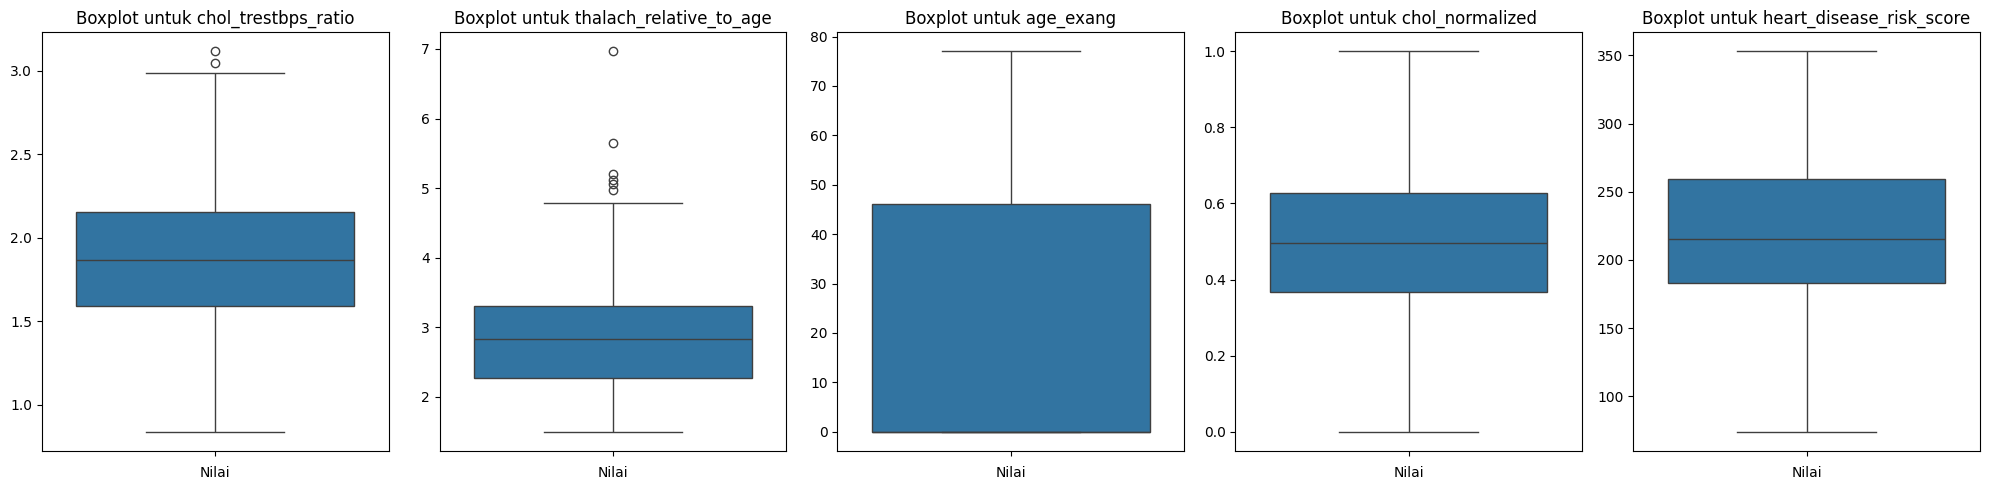

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(kolom_kolom), figsize=(20, 5))

for i, kolom in enumerate(kolom_kolom):
    sns.boxplot(y=dataset_final[kolom], ax=axes[i])
    axes[i].set_title(f'Boxplot untuk {kolom}')
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
for kolom in kolom_kolom:
    Q1 = dataset_final[kolom].quantile(0.25)
    Q3 = dataset_final[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    batas_kolom[kolom] = (lower_bound, upper_bound)

outliers = {}
for kolom in kolom_kolom:
    lower_bound, upper_bound = batas_kolom[kolom]
    outliers[kolom] = dataset_final[(dataset_final[kolom] < lower_bound) | (dataset_final[kolom] > upper_bound)]

In [ ]:
for kolom, (lower_bound, upper_bound) in batas_kolom.items():
    print(f"Kolom '{kolom}':")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print()

Kolom 'chol_trestbps_ratio':
Lower Bound: 0.7482638888888888
Upper Bound: 3.0028935185185186

Kolom 'thalach_relative_to_age':
Lower Bound: 0.7164276401564544
Upper Bound: 4.862451108213819

Kolom 'age_exang':
Lower Bound: -69.0
Upper Bound: 115.0

Kolom 'chol_normalized':
Lower Bound: -0.019736842105263164
Upper Bound: 1.0153508771929824

Kolom 'heart_disease_risk_score':
Lower Bound: 69.0
Upper Bound: 373.0



In [ ]:
print(f"Outliers pada kolom 'chol_trestbps_ratio':")
outliers['chol_trestbps_ratio']

Outliers pada kolom 'chol_trestbps_ratio':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score
98,57,1,0,110,335,0,1,143,1,3.0,...,3,0,3,3.045455,1,2.508772,57,0.916667,False,302
157,60,0,2,102,318,0,1,160,0,0.0,...,2,1,3,3.117647,1,2.666667,0,0.842105,False,260


Terdapat outlier pada kolom chol_trestbps_ratio, maka langkah selanjutnya dilakukan handling outlier.

In [ ]:
print(f"Outliers pada kolom 'thalach_relative_to_age':")
outliers['thalach_relative_to_age']

Outliers pada kolom 'thalach_relative_to_age':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score
12,34,0,1,118,210,0,1,192,0,0.7,...,2,1,1,1.779661,0,5.647059,0,0.368421,False,136
56,29,1,1,130,204,0,0,202,0,0.0,...,2,1,Unknown,1.569231,0,6.965517,0,0.342105,False,132
117,34,1,3,118,182,0,0,174,0,0.0,...,2,1,1,1.542373,0,5.117647,0,0.245614,False,126
184,35,0,0,138,183,0,1,182,0,1.4,...,2,1,1,1.326087,1,5.200000,0,0.250000,False,139
197,35,1,1,122,192,0,1,174,0,0.0,...,2,1,1,1.573770,0,4.971429,0,0.289474,False,140
220,37,1,2,130,250,0,1,187,0,3.5,...,2,1,1,1.923077,0,5.054054,0,0.543860,False,193


Terdapat outlier pada kolom thalach_relative_to_age, maka langkah selanjutnya dilakukan handling outlier.

In [ ]:
print(f"Outliers pada kolom 'age_exang':")
outliers['age_exang']

Outliers pada kolom 'age_exang':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score


Tidak terdapat outlier pada variabel age_exang.

In [ ]:
print(f"Outliers pada kolom 'chol_normalized':")
outliers['chol_normalized']

Outliers pada kolom 'chol_normalized':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score


Tidak terdapat outlier pada variabel chol_normalized.

In [ ]:
print(f"Outliers pada kolom 'heart_disease_risk_score':")
outliers['heart_disease_risk_score']

Outliers pada kolom 'heart_disease_risk_score':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score


Tidak terdapat outlier pada variabel heart_disease_risk_score.

Ditemukan outlier pada variabel chol_trestbps_ratio dan thalach_relative_ratio. Maka langkah selanjutnya yaitu dilakukan handling outlier.

### **Handling Outlier**

In [ ]:
# inisialisasi Dataset baru untuk menyimpan data selain outlier
dataset_fix = dataset_final.copy()

# loop melalui setiap kolom dan hapus baris yang merupakan outlier
for kolom in kolom_kolom:
    lower_bound, upper_bound = batas_kolom[kolom]
    dataset_fix = dataset_fix[~((dataset_fix[kolom] < lower_bound) | (dataset_fix[kolom] > upper_bound))].reset_index(drop=True)

# cetak Dataset baru yang hanya berisi data selain outlier
print("Dataset baru tanpa outlier:")
dataset_fix

Dataset baru tanpa outlier:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_category,chol_trestbps_ratio,status_ratio,thalach_relative_to_age,age_exang,chol_normalized,stroke_trestbps,heart_disease_risk_score
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,3,1.696000,0,3.230769,0,0.377193,False,169
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,3,1.450000,1,2.924528,53,0.337719,False,188
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,4,1.200000,1,1.785714,70,0.210526,True,194
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,4,1.371622,1,2.639344,0,0.337719,True,190
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,4,2.130435,0,1.709677,0,0.736842,False,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,68,0,2,120,211,0,0,115,0,1.5,...,2,1,4,1.758333,0,1.691176,0,0.372807,False,216
265,44,0,2,108,141,0,1,175,0,0.6,...,2,1,2,1.305556,1,3.977273,0,0.065789,False,74
266,52,1,0,128,255,0,1,161,1,0.0,...,3,0,3,1.992188,0,3.096154,52,0.565789,False,222
267,59,1,3,160,273,0,0,125,0,0.0,...,2,0,3,1.706250,0,2.118644,0,0.644737,True,308


In [ ]:
dataset_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       269 non-null    int64   
 1   sex                       269 non-null    int64   
 2   cp                        269 non-null    int64   
 3   trestbps                  269 non-null    int64   
 4   chol                      269 non-null    int64   
 5   fbs                       269 non-null    int64   
 6   restecg                   269 non-null    int64   
 7   thalach                   269 non-null    int64   
 8   exang                     269 non-null    int64   
 9   oldpeak                   269 non-null    float64 
 10  slope                     269 non-null    int64   
 11  ca                        269 non-null    int64   
 12  thal                      269 non-null    int64   
 13  target                    269 non-null    int64   

Dataset yang awalanya ada 277 rows sekarang menjadi 269 rows setelah dihandling outlier.

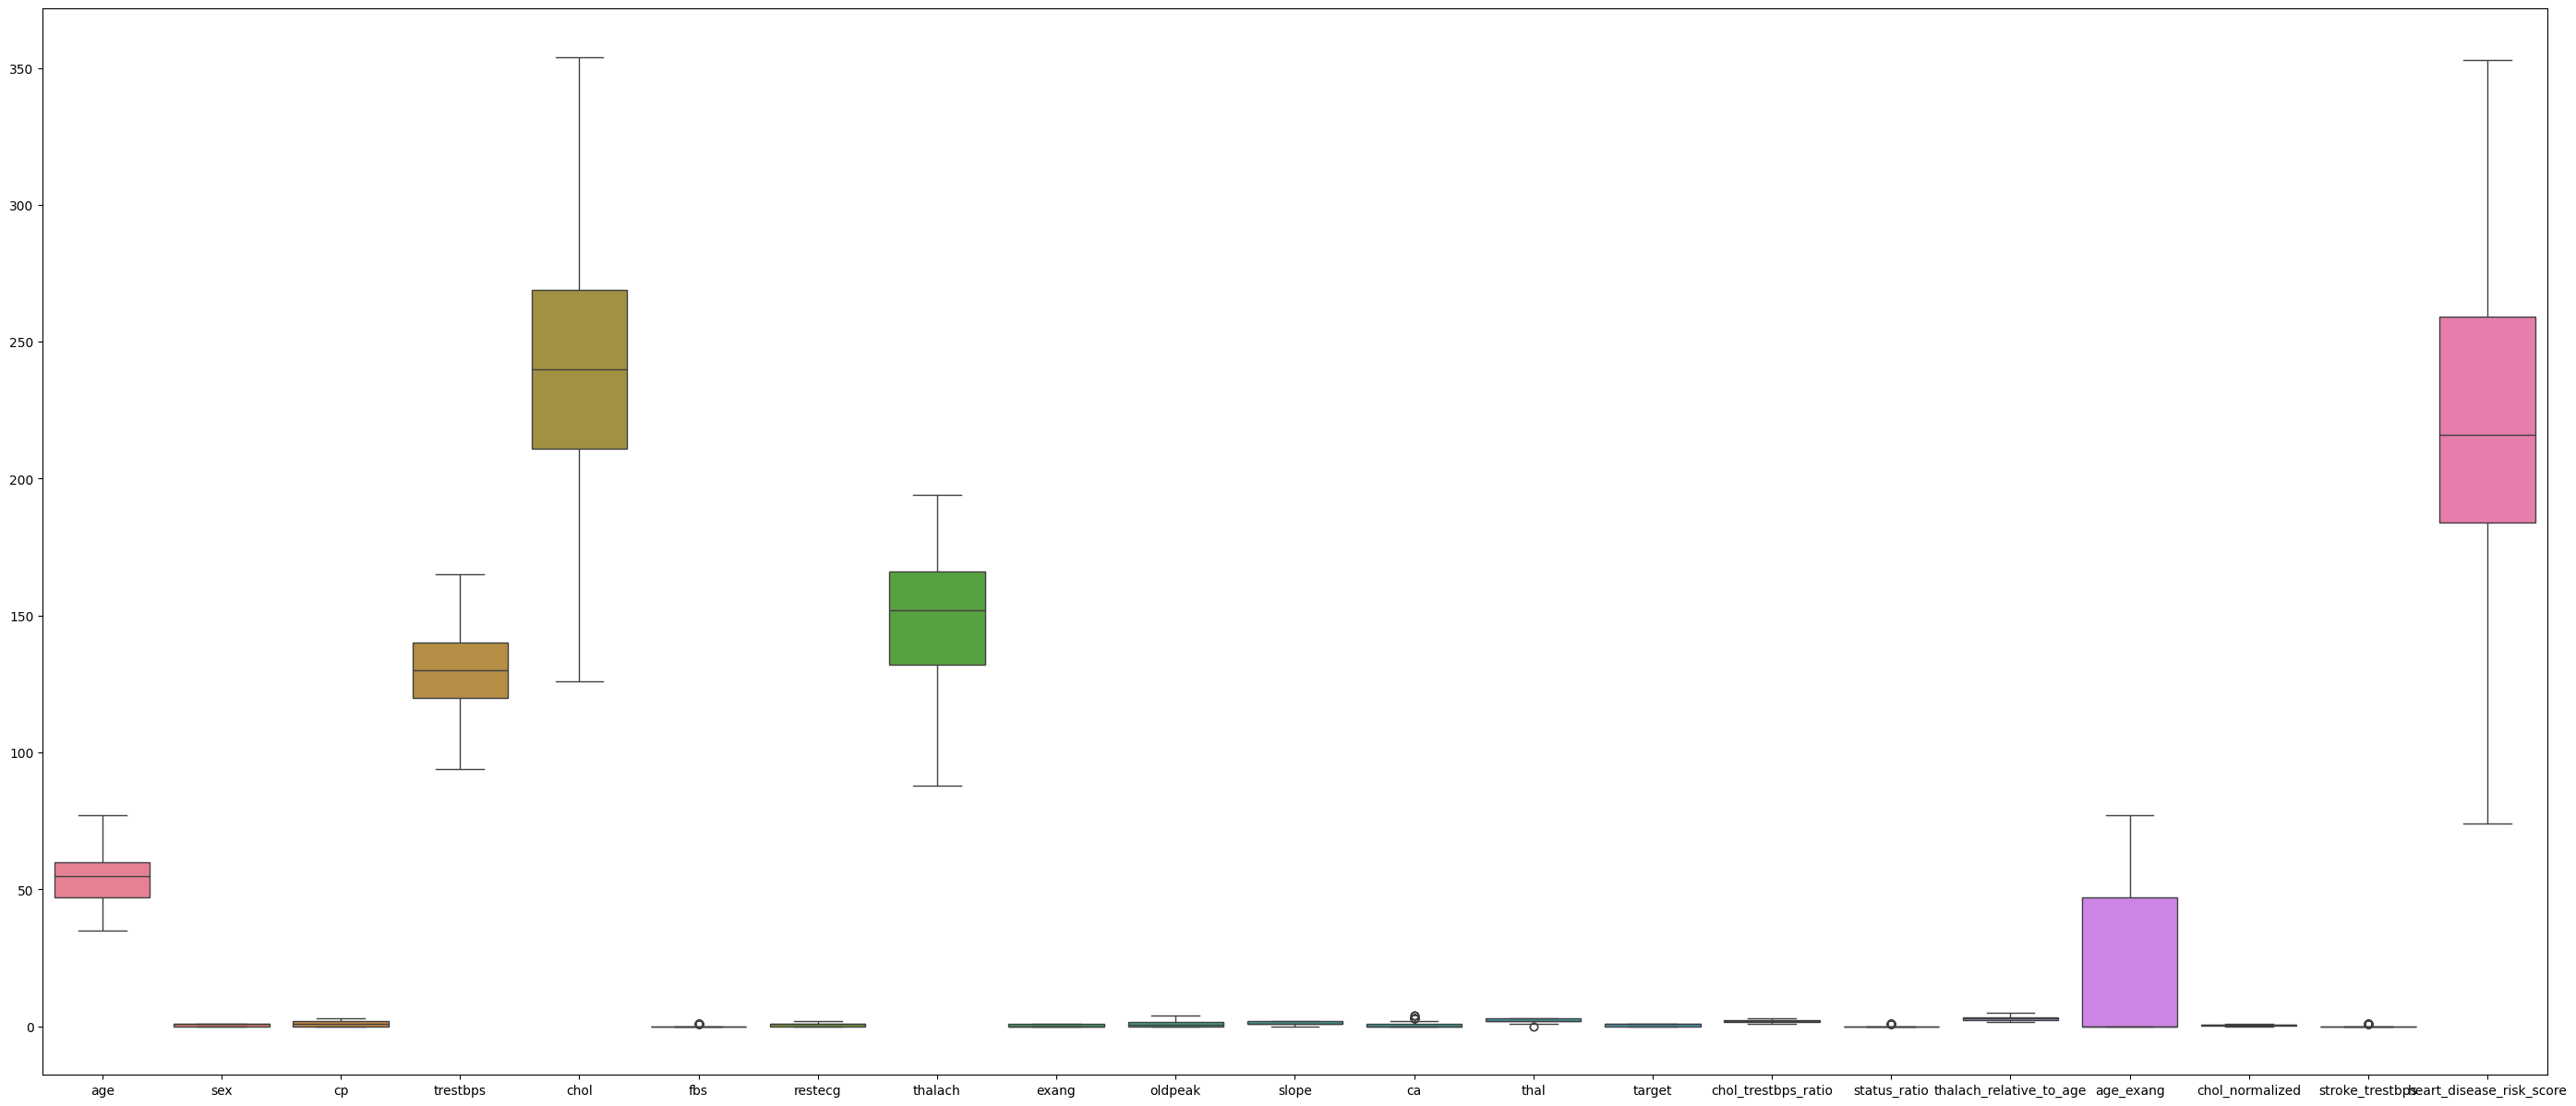

In [ ]:
dataset_fix = dataset_fix
dataset_fix

plt.figure(figsize=(35, 15))
sns.boxplot(data = dataset_fix)
plt.show()

Dilihat dari boxplot diatas bahwa outlier pada variabel chol_trestbps_ratio dan thalach_relative_ratio
sudah diatasi sehingga sudah tidak ada outlier. Untuk variabel status_ratio dan stroke_trestbps tidak dihandling karena variabel tersebut bersifat data biner dan kategorik.

## **Feature Encoding**

Karena semua data kategorikal pada fitur baru sudah di encode, maka tidak ada lagi feature engineering yang dapat di encode.

# **Model Development**

Dataset heart disease pada awalnya saat sebelum ada fitur baru berisi 13 kolom atribut dan 1 kolom label yang berisi 2 kelas yaitu 1 dan 0. Angka 1 menandakan bahwa orang tersebut sakit jantung (disease) dan 0 tidak ada penyakit (no disease). Setelah ditambah dengan fitur baru dataset menjadi 21 kolom atribut karena ada tambahan 8 kolom baru dari fitur baru dan 1 kolom label yang berisi 2 kelas yaitu 1 dan 0. Angka 1 menandakan bahwa orang tersebut sakit jantung (disease) dan 0 tidak ada penyakit (no disease). Terdapat 269 sampel yang merupakan 269 pasien penyakit jantung.

In [ ]:
dataset_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       269 non-null    int64   
 1   sex                       269 non-null    int64   
 2   cp                        269 non-null    int64   
 3   trestbps                  269 non-null    int64   
 4   chol                      269 non-null    int64   
 5   fbs                       269 non-null    int64   
 6   restecg                   269 non-null    int64   
 7   thalach                   269 non-null    int64   
 8   exang                     269 non-null    int64   
 9   oldpeak                   269 non-null    float64 
 10  slope                     269 non-null    int64   
 11  ca                        269 non-null    int64   
 12  thal                      269 non-null    int64   
 13  target                    269 non-null    int64   

### Feature Selection

Feature Selection adalah pemilihan fitur yang akan dimasukkan ke dalam model. Pemilihan fitur disini menggunakan heatmap correlation. Heatmap correlation bertujuan untuk melihat korelasi antara dua variabel atau lebih dalam bentuk matriks sehingga dapat mengetahui seberapa kuat hubungan antara dua fitur.

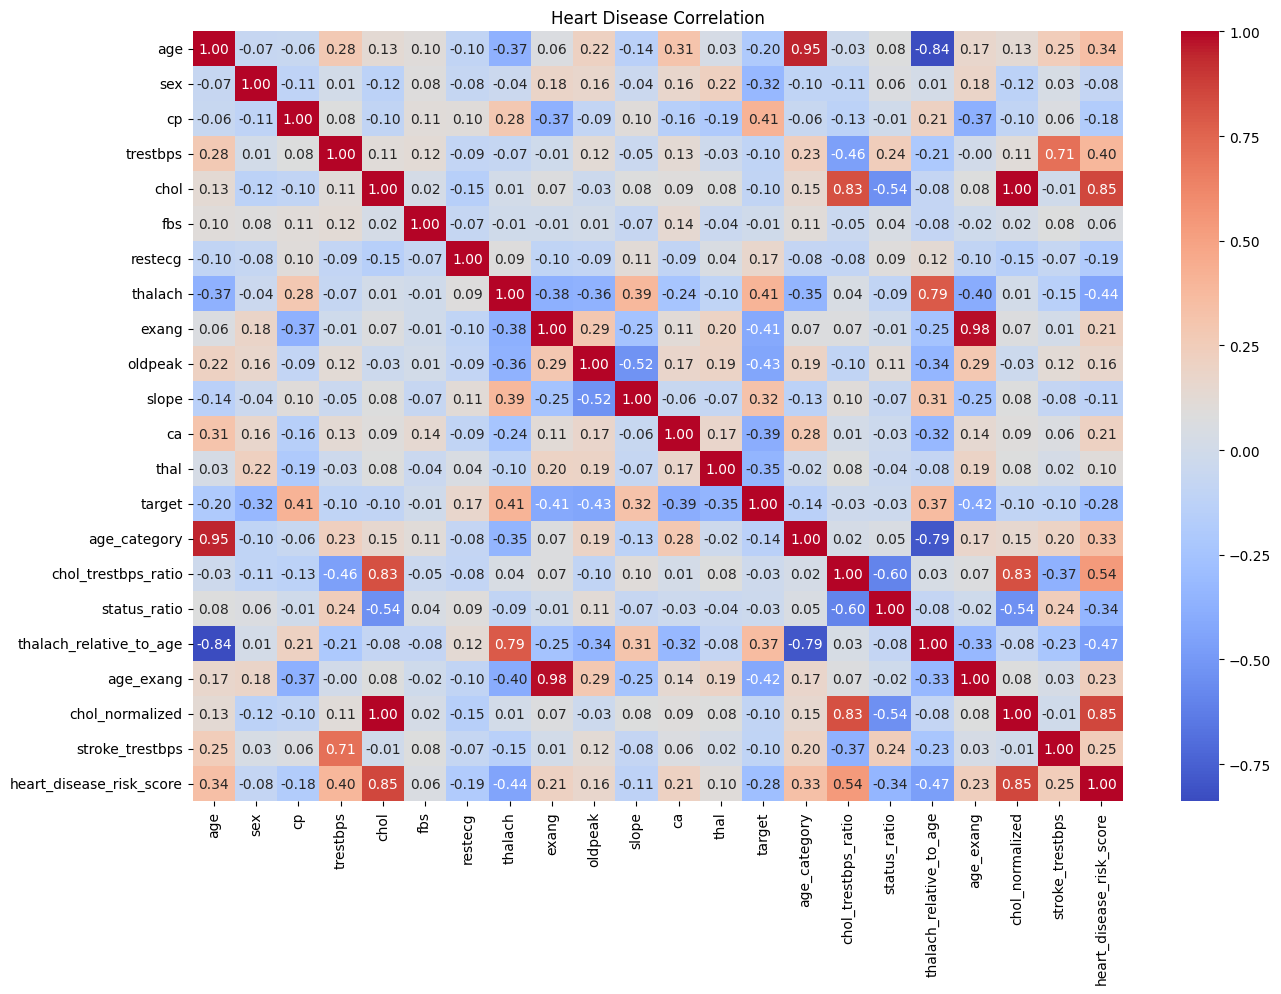

In [ ]:
# menghitung matriks korelasi
correlation_matrix = dataset_fix.corr()

# membuat heatmap korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heart Disease Correlation')
plt.show()

Setelah proses analisis korelasi diputuskan bahwa hanya 10 fitur yang akan dimasukkan ke dalam model regresi karena fitur ini yang memiliki hubungan yang kuat dengan variabel target. Fitur-fitur tersebut adalah sex (-0.32), cp (0.42), thalach (0.43), exang (-0.42), oldpeak (-0.43), slope (0.32), ca (-0.40), thal (-0.36), thalach_relative_to_age (0.37), dan age_exang (-0.42). Jadi, ada 10 fitur yang akan dimasukkan ke dalam model.

### Splitting Data

Pembagian ini bertujuan untuk memisahkan variabel X dan y. Sehingga nantinya dapat dilanjutkan dibagi menjadi data train dan data test 80:20.

In [ ]:
# memisahkan variabel X dan y, dimana X diisi oleh variabel yang dibutuhkan saja yang udah kita tentukan di feature selection
X = dataset_fix[['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'thalach_relative_to_age', 'age_exang']]

In [ ]:
y = dataset_fix['target']

In [ ]:
# membagai dataset menjadi data training dan data testing dengan proporsi 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X

,sex,cp,thalach,exang,oldpeak,slope,ca,thal,thalach_relative_to_age,age_exang
0,1,0,168,0,1.0,2,2,3,3.230769,0
1,1,0,155,1,3.1,0,0,3,2.924528,53
2,1,0,125,1,2.6,0,0,3,1.785714,70
3,1,0,161,0,0.0,2,1,3,2.639344,0
4,0,0,106,0,1.9,1,3,2,1.709677,0
...,...,...,...,...,...,...,...,...,...,...
264,0,2,115,0,1.5,1,0,2,1.691176,0
265,0,2,175,0,0.6,1,0,2,3.977273,0
266,1,0,161,1,0.0,2,1,3,3.096154,52
267,1,3,125,0,0.0,2,0,2,2.118644,0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
264    1
265    1
266    0
267    0
268    0
Name: target, Length: 269, dtype: int64

In [ ]:
# 80% data untuk dilatih
X_train

,sex,cp,thalach,exang,oldpeak,slope,ca,thal,thalach_relative_to_age,age_exang
123,1,3,144,1,1.8,1,0,2,2.250000,64
257,1,0,140,0,0.4,2,0,3,2.153846,0
256,1,0,125,1,3.6,1,1,2,2.049180,61
31,1,0,182,0,0.0,2,0,2,3.084746,0
18,1,0,148,1,3.0,1,0,2,3.288889,45
...,...,...,...,...,...,...,...,...,...,...
203,1,2,146,0,1.8,1,3,3,2.354839,0
255,1,3,174,0,1.4,1,1,2,2.676923,0
72,1,0,158,0,0.6,2,2,1,2.430769,0
235,1,0,160,0,1.2,2,0,2,2.962963,0


Membagai dataset menjadi data training dan data testing dengan proporsi 80:20 bertujuan untuk mengoptimalkan sampel data dalam melakukan training model dan memastikan bahwa model yang dibangun dapat menggeneralisasi pola dengan baik pada data baru dan memberikan hasil yang dapat diandalkan dalam praktiknya.

### Feature Scaling

Feature scaling bertujuan agar model dapat diterapkan pada semua fitur dengan adil sehingga semua fitur punya kontribusi yang sama besar terhadap hasil model yang dibuat, oleh karena itu perlu distandarisasi. Ini penting karena jika fitur memiliki skala yang berbeda-beda, algoritma machine learning mungkin memberikan bobot yang lebih besar kepada fitur dengan skala yang lebih besar, meskipun fitur tersebut mungkin tidak secara intrinsik lebih penting dalam memprediksi hasil. Hal ini dapat menghasilkan bias dan model yang tidak optimal.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# menampilkan dataset X_train setalah di scaling
np.set_printoptions(suppress=True)
print(X_train[:10])

[[ 0.61498384  2.02300832 -0.19675027  1.3662601   0.81756667 -0.71195759
  -0.70034072 -0.5169048  -0.76560585  1.67928297]
 [ 0.61498384 -0.87663694 -0.37082972 -0.73192505 -0.57197352  0.98882998
  -0.70034072  1.11742655 -0.89015777 -0.71795053]
 [ 0.61498384 -0.87663694 -1.02362767  1.3662601   2.60411834 -0.71195759
   0.36755471 -0.5169048  -1.0257356   1.56691265]
 [ 0.61498384 -0.87663694  1.45700454 -0.73192505 -0.968985    0.98882998
  -0.70034072 -0.5169048   0.3156737  -0.71795053]
 [ 0.61498384 -0.87663694 -0.02267081  1.3662601   2.00860111 -0.71195759
  -0.70034072 -0.5169048   0.58010845  0.96760428]
 [ 0.61498384 -0.87663694 -2.54682289 -0.73192505  0.0235437  -0.71195759
   1.43545014 -2.15123614 -1.70417846 -0.71795053]
 [ 0.61498384  2.02300832  1.45700454  1.3662601   2.80262408 -0.71195759
  -0.70034072  1.11742655  2.52387591  0.70540686]
 [ 0.61498384 -0.87663694  0.58660727  1.3662601  -0.968985    0.98882998
   2.50334557 -0.5169048  -0.95486007  2.16622103]


In [ ]:
print(y_train[:10])

123    1
257    1
256    0
31     1
18     1
201    0
159    0
110    0
184    1
261    1
Name: target, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# with function ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
rfc_fimp = pd.Series(rf.feature_importances_, index = X.columns)
rfc_fimp.sort_values(ascending=False)

ca                         0.206493
thalach_relative_to_age    0.142184
cp                         0.142144
oldpeak                    0.127669
thal                       0.125794
thalach                    0.123101
slope                      0.050425
age_exang                  0.041021
sex                        0.028755
exang                      0.012414
dtype: float64

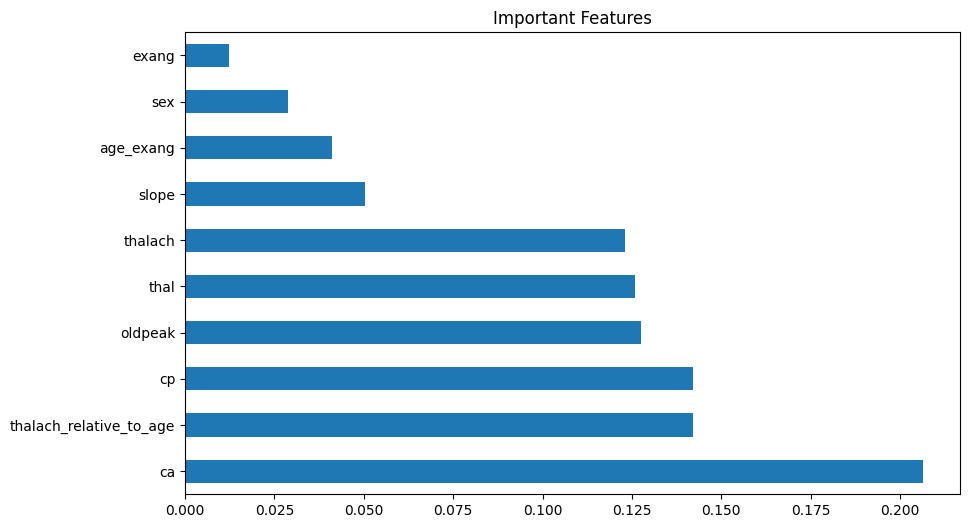

In [ ]:
plt.figure(figsize=(10,6))
rfc_fimp.nlargest(30).sort_values(ascending=False).plot(kind='barh')
round(rfc_fimp,4)*100
plt.title('Important Features',size=12)
plt.show()


Hasil dari feature scaling ini adalah nilai-nilai bobot (feature importances) yang diurutkan dari yang paling penting (dengan nilai tertinggi) ke yang paling tidak penting (dengan nilai terendah) berdasarkan model Random Forest Classifier. Dapat dilihat bahwa bobot paling tinggi adalah ca yaitu 0.206493 sedangkan paling rendah adalah exang yaitu  0.012414. Hal ini menunjukkan kontribusi relatif dari masing-masing fitur terhadap model yang telah dilatih. Fitur yang memiliki bobot yang lebih tinggi memiliki pengaruh yang lebih besar dalam memprediksi output dari model tersebut, sementara fitur dengan bobot yang lebih rendah memiliki pengaruh yang lebih kecil.

## Modelling

Dataset Heart Disease ini termasuk dalam masalah supervised learning karena dataset ini sudah dilengkapi dengan label atau kolom jawaban yang menunjukkan apakah pasien memiliki penyakit jantung atau tidak. Dalam kasus ini, target yang ingin diprediksi adalah apakah pasien memiliki penyakit jantung atau tidak sehingga termasuk classification. Karena kita ingin memprediksi kelas dari label tersebut (yaitu, apakah pasien memiliki penyakit jantung atau tidak), maka masalah ini masuk ke dalam kategori supervised learning classification.

Model machine learning yang akan di buat bertujuan untuk mengklasifikasikan apakah seorang pasien sakit jantung atau tidak.

### **Random Forest**

Alasan mengapa memilih Random Forest sebagai model supervised learning classification untuk dataset Heart Disease adalah karena Random Forest memiliki fitur-fitur yang saling terkait dan memiliki pengaruh yang kompleks terhadap target (apakah pasien memiliki penyakit jantung atau tidak) sehingga diharapkan Random Forest dapat menangani interaksi fitur ini dengan baik. Selain itu, Random Forest juga memiliki kemampuan untuk mengatasi overfitting karena menggunakan teknik penggabungan beberapa pohon keputusan (decision trees) sehingga mampu meminimalisir overfitting karena output didasarkan pada
voting mayoritas atau rata-rata.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1 = RandomForestClassifier(random_state=10)
# model1 = RandomizedSearchCV(estimator = clf, param_distributions, n_iter = 80,
                               # cv = 4, verbose= 5, random_state= 101, n_jobs = -1)

model1.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

Model fit untuk Random Forest digunakan untuk melatih model Random Forest pada dataset Heart Disease. Proses pelatihan ini melibatkan penggunaan algoritma Random Forest untuk mempelajari pola dari data latih, sehingga model dapat membuat prediksi yang akurat pada data yang belum pernah dilihat sebelumnya.

Selama proses fit, model Random Forest akan mengidentifikasi hubungan antara fitur yang ada dalam dataset dan label atau target yang ingin diprediksi. Ini dilakukan dengan membuat serangkaian pohon keputusan yang dihasilkan secara acak, di mana setiap pohon keputusan dihasilkan menggunakan sampel acak dari data latih dan subset acak dari fitur.

Setelah proses fit selesai, model dapat digunakan untuk membuat prediksi pada data baru. Model yang telah dilatih ini kemudian dapat dievaluasi untuk melihat seberapa baiknya performa dalam memprediksi label target pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# predict the Test Result
y_pred_rf = model1.predict(X_test)
y_pred_rf

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

Langkah berikutnya adalah melihat confusion matrix untuk memudahkan dalam mengetahui apakah terdapat kesalahan dalam pengklasifikasian.

In [ ]:
# evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[16,  3],
       [ 5, 30]])

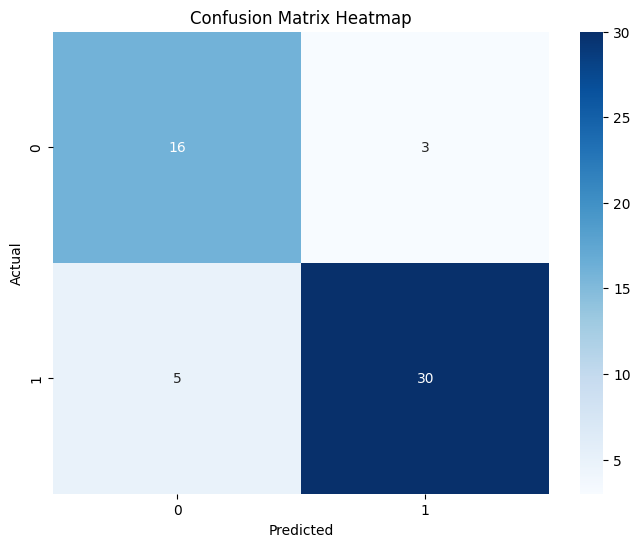

In [ ]:
# visualisasi confusion matrix sebagai heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Confusion matrix untuk memudahkan dalam mengetahui apakah terdapat kesalahan dalam pengklasifikasian.
* Berdasarkan output, diketahui bahwa terdapat 16 prediksi **True Positive** (TP), yaitu kasus positif yang diprediksi dengan benar. Dimana 16 pasien yang diklasifikasikan ke dalam pasien yang mengidap penyakit jantung, benar-benar dalam keadaan sakit jantung.
* Berdasarkan output, diketahui bahwa terdapat 3 kesalahan (**False Positive**) dalam pengklasifikasian menggunakan algoritma Random Forest, yaitu 3 pasien diklasifikasikan dalam pasien yang tidak mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien mengidap penyakit jantung atau sakit jantung.
* Berdasarkan output, juga diketahui bahwa terdapat 5 kesalahan (**False Negative**) dalam pengklasifikasian menggunakan algoritma Random Forest, yaitu 5 pasien diklasifikasikan sebagai pasien yang mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien tidak mengidap sakit jantung.
* Berdasarkan output, diketahui bahwa terdapat 30 prediksi **True Negative** (TN), yaitu kasus negatif yang diprediksi dengan benar. Dimana 30 pasien yang diklasifikasikan ke dalam pasien yang tidak sakit jantung dan diprediksi dengan benar sebagai bukan penderita penyakit jantung.

Ini menunjukkan bahwa meskipun model Random Forest memberikan hasil yang bagus dalam mengklasifikasikan sebagian besar data, masih ada kesalahan yang signifikan dalam memprediksi kasus positif dan negatif. Sehingga perlu dilakukan langkah selanjutnya. Kemudian kita akan melihat akurasi dari hasil pengklasifikasian menggunakan algoritma Random Forest. Akurasi merupakan proporsi jumlah prediksi benar.

In [ ]:
y_pred_rf =model1.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print("accuracy_rf:", accuracy_rf)

accuracy_rf: 0.8518518518518519


Dengan Random Forest diperoleh model yang mendapatkan nilai akurasi sebesar **0.8519 = 85.19%**.

Hasil akurasi dari model Random Forest sebesar 0.8519 yang berarti bahwa model tersebut berhasil memprediksi dengan benar sekitar 85.19% dari total dataset yang digunakan. Nilai akurasi tersebut terbilang cukup tinggi dan bagus. Jadi, karena nilai akurasi tersebut terbilang cukup tinggi maka dapat disimpulkan bahwa model tersebut layak digunakan untuk memodelkan data.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.91      0.86      0.88        35

    accuracy                           0.85        54
   macro avg       0.84      0.85      0.84        54
weighted avg       0.86      0.85      0.85        54



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# menghitung presisi
precision_rf = precision_score(y_test, y_pred_rf)

# menghitung recall
recall_rf = recall_score(y_test, y_pred_rf)

# menghitung F1 score
f1_rf = f1_score(y_test, y_pred_rf)

print("precision_rf:", precision_rf)
print("recall_rf:", recall_rf)
print("f1-score_rf:", f1_rf)


precision_rf: 0.9090909090909091
recall_rf: 0.8571428571428571
f1-score_rf: 0.8823529411764706


*  Precision mengukur seberapa akurat model tersebut. Hasil dari precision untuk kelas 0 (no disease/tidak sakit jantung) adalah **0.76** atau **76%** dari semua pasien yang diprediksi sebagai no disease atau tidak sakit jantung adalah **76%** benar-benar tidak sakit jantung (no disease). Sedangkan untuk kelas 1 (disease/sakit jantung), hasilnya adalah **0.91** atau **91%** dari semua pasien yang diprediksi sebagai sakit jantung adalah **91%** benar-benar sakit jantung. Gap antara precision tidak cukup bagus karena antara kelas 0 dan 1 gapnya terlalu banyak.

*   Recall (dikenal juga sebagai sensitivity) mengukur seberapa baik model dalam menangkap semua kasus positif yang sebenarnya. Untuk kelas 0 (no disease), recall adalah **0.84**, yang berarti model dapat menangkap **84%** dari semua kasus pasien yang sebenarnya tidak sakit jantung. Sedangkan untuk kelas 1 (disease), recall adalah **0.86** yang berarti model dapat menangkap **86%** dari semua kasus pasien yang sebenarnya sakit jantung. Gap antara recall bagus karena antara kelas 0 dan 1 gapnya sedikit sekali dan hampir balance.

*   F1-score adalah ukuran yang menggabungkan precision dan recall menjadi satu metrik. Ini adalah rata-rata tertimbang dari precision dan recall. Untuk kelas 0 (tidak sakit jantung) hasil dari F1-score adalah **0.80**, sedangkan untuk kelas 1 (sakit jantung) hasil dari F1-score adalah **0.88**. Dengan F1-score sekitar 0.80 untuk kelas 0 dan 0.88 untuk kelas 1, dapat disimpulkan bahwa model secara keseluruhan memberikan kinerja yang baik dalam mengklasifikasikan kedua kelas. Tetapi, ini juga bisa diartikan bahwa model cenderung lebih baik dalam mengidentifikasi pasien yang sebenarnya mengidap penyakit jantung daripada mengidentifikasi pasien yang sebenarnya tidak mengidap penyakit jantung karena F1-score untuk kelas 1 lebih tinggi daripada kelas 0.

* Informasi support adalah jumlah contoh sampel dalam setiap kelas. Dalam konteks ini, support untuk kelas 0 (tidak sakit jantung) adalah 19, yang berarti ada 19 sampel yang sebenarnya termasuk dalam kelas tersebut. Sedangkan untuk kelas 1 (sakit jantung), support adalah 35, yang berarti ada 35 sampel yang sebenarnya termasuk dalam kelas tersebut. Dalam kasus ini, terdapat lebih banyak sampel dari kelas 1 (sakit jantung) dibandingkan dengan kelas 0 (tidak sakit jantung) yang dapat mempengaruhi penilaian kinerja model.







### **Support Vector Machine (SVM)**

Alasan memilih Support Vector Machine (SVM) sebagai model supervised learning classification untuk dataset Heart Disease adalah karena SVM efektif dalam menangani dataset dengan jumlah fitur yang besar (dimensi tinggi), yang seringkali terjadi dalam bidang kesehatan di mana banyak fitur yang relevan dapat direkam untuk setiap pasien. Selain itu, SVM juga menghasilkan model yang relatif mudah diinterpretasikan, terutama dalam kasus menggunakan kernel linear, di mana hyperplane yang dipilih secara langsung menunjukkan batas keputusan antara dua kelas.

In [ ]:
# import svm model
from sklearn import svm

In [ ]:
# create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

Model fit ini akan menggunakan data pelatihan untuk belajar pola dari fitur dan label yang ada. Proses ini mencakup penyesuaian parameter model agar sesuai dengan data pelatihan sehingga dapat membuat prediksi yang sesuai. Setelah proses pelatihan selesai, model dapat digunakan untuk membuat prediksi pada data baru.

Model fit Support Vector Machine (SVM) digunakan untuk melatih model SVM pada data latih. Proses pelatihan ini melibatkan menyesuaikan parameter model dengan pola yang terdapat dalam data latih sehingga model dapat menghasilkan prediksi yang akurat pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
y_test

12     1
197    0
51     1
147    1
145    1
177    1
11     0
58     1
39     1
70     1
34     1
221    1
186    1
4      0
265    1
268    0
243    1
172    1
105    1
88     1
44     0
194    1
106    0
38     1
73     1
231    1
134    1
127    0
173    1
192    1
169    1
179    1
251    0
220    0
180    1
199    1
99     0
102    1
27     0
95     1
266    0
204    1
93     1
19     1
90     0
206    0
228    0
120    1
146    1
176    0
62     0
250    1
174    0
230    0
Name: target, dtype: int64

Langkah berikutnya adalah melihat confusion matrix untuk memudahkan dalam mengetahui apakah terdapat kesalahan dalam pengklasifikasian.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  2],
       [ 4, 31]])

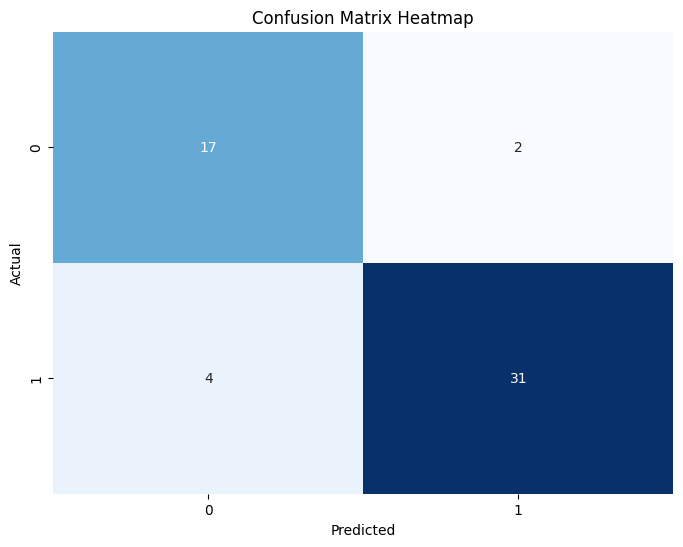

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

* Berdasarkan output, diketahui bahwa terdapat 17 prediksi **True Positive** (TP), yaitu kasus positif yang diprediksi dengan benar. Dimana 17 pasien yang diklasifikasikan ke dalam pasien yang mengidap penyakit jantung, benar-benar dalam keadaan sakit jantung.
* Berdasarkan output, diketahui bahwa terdapat 2 kesalahan (**False Positive**) dalam pengklasifikasian menggunakan algoritma SVM, yaitu 2 pasien diklasifikasikan dalam pasien yang tidak mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien mengalami penyakit jantung atau sakit jantung.
* Berdasarkan output, juga diketahui bahwa terdapat 4 kesalahan (**False Negative**) dalam pengklasifikasian menggunakan algoritma SVM, yaitu 4 pasien diklasifikasikan sebagai pasien yang mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien tidak mengalami sakit jantung.
* Berdasarkan output, diketahui bahwa terdapat 31 prediksi **True Negative** (TN), yaitu kasus negatif yang diprediksi dengan benar. Dimana 31 pasien yang diklasifikasikan ke dalam pasien yang tidak sakit jantung dan diprediksi dengan benar sebagai bukan penderita penyakit jantung.

Ini menunjukkan bahwa meskipun model SVM memberikan hasil yang bagus dalam mengklasifikasikan sebagian besar data, masih ada kesalahan yang signifikan dalam memprediksi kasus positif dan negatif. Sehingga perlu dilakukan langkah selanjutnya. Kemudian kita akan melihat akurasi dari hasil pengklasifikasian menggunakan algoritma SVM. Akurasi merupakan proporsi jumlah prediksi benar.

In [ ]:
accuracy_svm = clf.score(X_test, y_test)
print("accuracy_svm:", accuracy_svm)

accuracy_svm: 0.8888888888888888


Akurasi yang diperoleh adalah sebesar **0.89 = 89%**

Hasil ini bisa dikatakan sebagai hasil yang cukup tinggi dan bagus. Nilai akurasi tersebut terbilang cukup tinggi dan dapat disimpulkan bahwa model tersebut layak digunakan untuk memodelkan data.



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.94      0.89      0.91        35

    accuracy                           0.89        54
   macro avg       0.87      0.89      0.88        54
weighted avg       0.89      0.89      0.89        54



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# menghitung presisi
precision_svm = precision_score(y_test, y_pred)

# menghitung recall
recall_svm = recall_score(y_test, y_pred)

# menghitung F1 score
f1_svm = f1_score(y_test, y_pred)

print("precision_svm:", precision_svm)
print("recall_svm:", recall_svm)
print("f1-score_svm:", f1_svm)

precision_svm: 0.9393939393939394
recall_svm: 0.8857142857142857
f1-score_svm: 0.9117647058823529


* Precision untuk kelas 0 (tidak sakit jantung/no disease) yaitu sebesar **0.81** yang menunjukkan bahwa dari semua prediksi positif (prediksi pasien tidak mengidap penyakit jantung), **81%** di antaranya benar-benar tidak sakit jantung. Sedangkan untuk kelas 1 (sakit jantung/disease) yaitu menghasilkan precision sebesar **0.94** yang menunjukkan bahwa dari semua prediksi positif (prediksi pasien mengidap penyakit jantung), **94%** di antaranya benar-benar sakit jantung. Gap antara precision tidak cukup bagus karena antara kelas 0 dan 1 gapnya terlalu banyak.
* Recall untuk kelas 0 yaitu sebesar **0.89** yang menunjukkan bahwa dari semua pasien yang sebenarnya tidak mengidap penyakit jantung, model berhasil mengklasifikasikan **89%** dari mereka dengan benar. Untuk kelas 1, recall sebesar **0.89** menunjukkan bahwa dari semua pasien yang sebenarnya mengidap penyakit jantung, model berhasil mengklasifikasikan **89%** dari mereka dengan benar. Recall antara kelas 0 dan kelas 1 sangat bagus karena balance.
* F1-score untuk kelas 0, yaitu sebesar **0.85**. Untuk kelas 1, F1-score sebesar **0.91**. Dalam kasus ini, F1-score untuk kelas 1 (sakit jantung) lebih tinggi daripada kelas 0 (tidak sakit jantung), yang menunjukkan bahwa model memiliki keseimbangan yang lebih baik antara precision dan recall untuk kelas 1. Ini bisa diartikan bahwa model cenderung lebih baik dalam mengidentifikasi pasien yang sebenarnya mengidap penyakit jantung daripada mengidentifikasi pasien yang sebenarnya tidak mengidap penyakit jantung.
* Informasi support adalah jumlah contoh sampel dalam setiap kelas. Dalam konteks ini, support untuk kelas 0 (tidak sakit jantung) adalah 19, yang berarti ada 19 sampel yang sebenarnya termasuk dalam kelas tersebut. Sedangkan untuk kelas 1 (sakit jantung), support adalah 35, yang berarti ada 35 sampel yang sebenarnya termasuk dalam kelas tersebut. Dalam kasus ini, terdapat lebih banyak sampel dari kelas 1 (sakit jantung) dibandingkan dengan kelas 0 (tidak sakit jantung) yang dapat mempengaruhi penilaian kinerja model.

### **Decision Tree**

Alasan memilih Decision Tree sebagai model supervised learning classification untuk dataset Heart Disease adalah karena Mudah diinterpretasikan dimana sifat hierarki decision tree juga memudahkan untuk melihat atribut mana yang paling penting. Selain itu, juga lebih fleksibel karena bisa untuk tugas klasifikasi maupun regresi, sehingga hal ini membuat Decision Tree lebih fleksibel daripada beberapa algoritma lainnya.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=4)

In [ ]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Model fit ini akan menggunakan data pelatihan untuk belajar pola dari fitur dan label yang ada. Proses ini mencakup penyesuaian parameter model agar sesuai dengan data pelatihan sehingga dapat membuat prediksi yang sesuai. Setelah proses pelatihan selesai, model dapat digunakan untuk membuat prediksi pada data baru.

Model fit pada Decision Tree digunakan untuk melatih model Decision Tree pada data latih. Proses pelatihan ini melibatkan pembangunan struktur pohon keputusan berdasarkan pola yang terdapat dalam data latih. Tujuan utamanya adalah untuk membuat pohon keputusan yang dapat memisahkan kelas target dengan cara yang optimal.

In [ ]:
y_pred_dt = model3.predict(X_test).reshape(-1, 1)

Langkah berikutnya adalah melihat confusion matrix untuk memudahkan dalam mengetahui apakah terdapat kesalahan dalam pengklasifikasian.

In [ ]:
# evaluate the model
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[12,  7],
       [ 6, 29]])

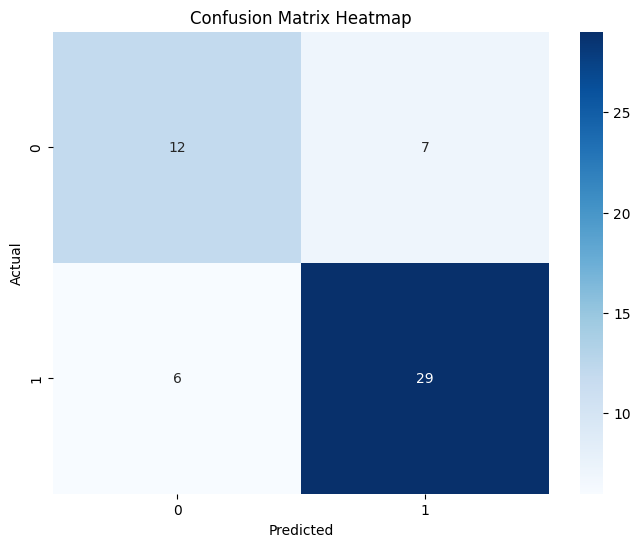

In [ ]:
# visualisasi confusion matrix sebagai heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Confusion matrix untuk memudahkan dalam mengetahui apakah terdapat kesalahan dalam pengklasifikasian.
* Berdasarkan output, diketahui bahwa terdapat 12 prediksi **True Positive** (TP), yaitu kasus positif yang diprediksi dengan benar. Dimana 12 pasien yang diklasifikasikan ke dalam pasien yang mengidap penyakit jantung, benar-benar dalam keadaan sakit jantung.
* Berdasarkan output, juga diketahui bahwa terdapat 7 prediksi kesalahan **False Positive** (FP), yaitu 7 pasien diklasifikasikan dalam pasien yang tidak mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien mengalami penyakit jantung atau sakit jantung.
* Berdasarkan output, juga diketahui bahwa terdapat 6 prediksi kesalahan (**False Negative**), yaitu 6 pasien diklasifikasikan sebagai pasien yang mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien tidak mengalami sakit jantung.
* Berdasarkan output, diketahui bahwa terdapat 29 prediksi **True Negative** (TN), yaitu kasus negatif yang diprediksi dengan benar. Dimana 29 pasien yang diklasifikasikan ke dalam pasien yang tidak sakit jantung dan diprediksi dengan benar sebagai bukan penderita penyakit jantung.


Ini menunjukkan bahwa meskipun model Decision Tree memberikan hasil yang bagus dalam mengklasifikasikan sebagian besar data, masih ada kesalahan yang signifikan dalam memprediksi kasus positif dan negatif. Sehingga perlu dilakukan langkah selanjutnya. Kemudian kita akan melihat akurasi dari hasil pengklasifikasian menggunakan algoritma Decision Tree. Akurasi merupakan proporsi jumlah prediksi benar.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_pred_dt, y_test)
print("accuracy_dt:", accuracy_dt)

accuracy_dt: 0.7592592592592593


Akurasi yang diperoleh adalah sebesar **0.76** = **76**

Hasil ini bisa dikatakan sebagai hasil yang cukup tinggi dan bagus. Nilai akurasi tersebut terbilang cukup tinggi dan dapat disimpulkan bahwa model tersebut layak digunakan untuk memodelkan data.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.81      0.83      0.82        35

    accuracy                           0.76        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.76      0.76      0.76        54



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# menghitung akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# menghitung presisi
precision_dt = precision_score(y_test, y_pred_dt)

# menghitung recall
recall_dt = recall_score(y_test, y_pred_dt)

# menghitung F1 score
f1_dt = f1_score(y_test, y_pred_dt)

print("precision_dt:", precision_dt)
print("recall_dt:", recall_dt)
print("f1-score_dt:", f1_dt)

precision_dt: 0.8055555555555556
recall_dt: 0.8285714285714286
f1-score_dt: 0.8169014084507044


* Precision untuk kelas 0 (tidak sakit jantung/no disease) yaitu sebesar **0.67** yang menunjukkan bahwa dari semua prediksi positif (prediksi pasien tidak mengidap penyakit jantung), **67** di antaranya benar-benar tidak sakit jantung. Sedangkan untuk kelas 1 (sakit jantung/disease) yaitu menghasilkan precision sebesar **0.81** yang menunjukkan bahwa dari semua prediksi positif (prediksi pasien mengidap penyakit jantung), **81%** di antaranya benar-benar sakit jantung. Gap antara precision kelas 0 dan kelas 1 tidak cukup bagus karena antara kelas 0 dan 1 gapnya cukup banyak.
* Recall untuk kelas 0 yaitu sebesar **0.63** yang menunjukkan bahwa dari semua pasien yang sebenarnya tidak mengidap penyakit jantung, model berhasil mengklasifikasikan **63%** dari mereka dengan benar. Untuk kelas 1, recall sebesar **0.83** menunjukkan bahwa dari semua pasien yang sebenarnya mengidap penyakit jantung, model berhasil mengklasifikasikan **83%** dari mereka dengan benar. Recall antara kelas 0 dan kelas 1 tidak bagus karena gapnya terlalu banyak.
* F1-score untuk kelas 0, yaitu sebesar **0.65**. Untuk kelas 1, F1-score sebesar **0.82**. Dalam kasus ini, F1-score untuk kelas 1 (sakit jantung) lebih tinggi daripada kelas 0 (tidak sakit jantung), yang menunjukkan bahwa model memiliki keseimbangan yang lebih baik antara precision dan recall untuk kelas 1. Ini bisa diartikan bahwa model cenderung lebih baik dalam mengidentifikasi pasien yang sebenarnya mengidap penyakit jantung daripada mengidentifikasi pasien yang sebenarnya tidak mengidap penyakit jantung.
* Informasi support adalah jumlah contoh sampel dalam setiap kelas. Dalam konteks ini, support untuk kelas 0 (tidak sakit jantung) adalah 19, yang berarti ada 19 sampel yang sebenarnya termasuk dalam kelas tersebut. Sedangkan untuk kelas 1 (sakit jantung), support adalah 35, yang berarti ada 35 sampel yang sebenarnya termasuk dalam kelas tersebut. Dalam kasus ini, terdapat lebih banyak sampel dari kelas 1 (sakit jantung) dibandingkan dengan kelas 0 (tidak sakit jantung) yang dapat mempengaruhi penilaian kinerja model.

### **k-NN**

Alasan memilih k-NN sebagai model supervised learning classification untuk dataset Heart Disease karena k-NN adalah salah satu algoritma yang paling mudah dimengerti dalam machine learning. Konsepnya sederhana dalam mengklasifikasikan sebuah data baru, karena kita hanya perlu melihat pada k data terdekat dalam ruang fitur dan menentukan mayoritas kelas dari k tetangga tersebut. k-NN tidak terpengaruh oleh data bernilai tinggi atau data yang memiliki outlier. Ini karena prediksinya didasarkan pada tetangga terdekat.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
# define the model --> K-NN, value K got from square root leng y_test, K=11
model4 = KNeighborsClassifier(n_neighbors=11, metric='euclidean')

In [ ]:
# fit model
model4.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

Model fit ini akan menggunakan data pelatihan untuk belajar pola dari fitur dan label yang ada. Proses ini mencakup penyesuaian parameter model agar sesuai dengan data pelatihan sehingga dapat membuat prediksi yang sesuai. Setelah proses pelatihan selesai, model dapat digunakan untuk membuat prediksi pada data baru.

Model fit untuk k-NN bertujuan untuk melatih model k-Nearest Neighbors pada data latih. Proses pelatihan ini melibatkan pembangunan struktur yang memungkinkan model untuk "mengingat" atau menyimpan data latih. Dalam k-NN, tidak ada proses pembangunan model yang kompleks seperti pada algoritma lain, seperti Decision Tree. Sebagai gantinya, model hanya perlu menyimpan data latih dalam bentuk yang efisien sehingga dapat dengan cepat menemukan tetangga terdekat dari setiap titik data uji.

In [ ]:
# predict the Test Result
y_pred_knn = model4.predict(X_test)
y_pred_knn

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

Langkah berikutnya adalah melihat confusion matrix untuk memudahkan dalam mengetahui apakah terdapat kesalahan dalam pengklasifikasian.

In [ ]:
# evaluate the model
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[17,  2],
       [ 4, 31]])

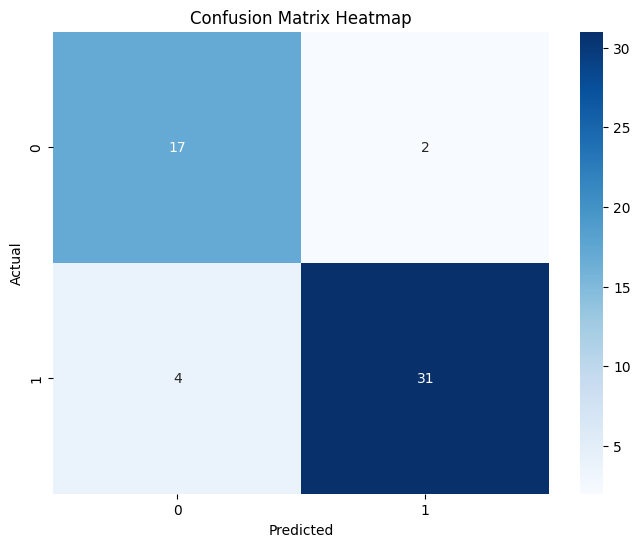

In [ ]:
# visualisasi confusion matrix sebagai heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Confusion matrix untuk memudahkan dalam mengetahui apakah terdapat kesalahan dalam pengklasifikasian.
* Berdasarkan output, diketahui bahwa terdapat 17 prediksi **True Positive** (TP), yaitu kasus positif yang diprediksi dengan benar. Dimana 17 pasien yang diklasifikasikan ke dalam pasien yang mengidap penyakit jantung, benar-benar dalam keadaan sakit jantung.
* Berdasarkan output, diketahui bahwa terdapat 2 kesalahan (**False Positive**) dalam pengklasifikasian menggunakan algoritma k-NN, yaitu 2 pasien diklasifikasikan dalam pasien yang tidak mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien mengalami penyakit jantung atau sakit jantung.
* Berdasarkan output, juga diketahui bahwa terdapat 4 kesalahan (**False Negative**) dalam pengklasifikasian menggunakan algoritma k-NN, yaitu 4 pasien diklasifikasikan sebagai pasien yang mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien tidak mengalami sakit jantung.
*  Berdasarkan output, diketahui bahwa terdapat 31 prediksi **True Negative** (TN), yaitu kasus negatif yang diprediksi dengan benar. Dimana 31 pasien yang diklasifikasikan ke dalam pasien yang tidak sakit jantung dan diprediksi dengan benar sebagai bukan penderita penyakit jantung.


Ini menunjukkan bahwa meskipun model k-NN memberikan hasil yang bagus dalam mengklasifikasikan sebagian besar data, masih ada kesalahan yang signifikan dalam memprediksi kasus positif dan negatif. Sehingga perlu dilakukan langkah selanjutnya. Kemudian kita akan melihat akurasi dari hasil pengklasifikasian menggunakan algoritma k-NN. Akurasi merupakan proporsi jumlah prediksi benar.

In [ ]:
accuracy_knn = model4.score(X_test, y_test)
print("accuracy_knn:", accuracy_knn)

accuracy_knn: 0.8888888888888888


Akurasi yang diperoleh adalah sebesar **0.89** = **89%**

Hasil ini bisa dikatakan sebagai hasil yang cukup tinggi dan bagus. Nilai akurasi tersebut terbilang cukup tinggi dan dapat disimpulkan bahwa model tersebut layak digunakan untuk memodelkan data.


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.94      0.89      0.91        35

    accuracy                           0.89        54
   macro avg       0.87      0.89      0.88        54
weighted avg       0.89      0.89      0.89        54



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# menghitung presisi
precision_knn = precision_score(y_test, y_pred_knn)

# menghitung recall
recall_knn = recall_score(y_test, y_pred_knn)

# menghitung F1 score
f1_knn = f1_score(y_test, y_pred_knn)

print("precision_knn:", precision_knn)
print("recall_knn:", recall_knn)
print("f1-score_knn:", f1_knn)

precision_knn: 0.9393939393939394
recall_knn: 0.8857142857142857
f1-score_knn: 0.9117647058823529


* Precision untuk kelas 0 (tidak sakit jantung) yaitu sebesar **0.81** yang menunjukkan bahwa dari semua prediksi positif (prediksi pasien tidak mengidap penyakit jantung), **81%** di antaranya benar-benar tidak sakit jantung. Sedangkan untuk kelas 1 (sakit jantung/disease) yaitu menghasilkan precision sebesar **0.94** yang menunjukkan bahwa dari semua prediksi positif (prediksi pasien mengidap penyakit jantung), **94%** di antaranya benar-benar sakit jantung. Gap antara precision tidak cukup bagus karena antara kelas 0 dan 1 gapnya terlalu banyak.
* Recall untuk kelas 0 yaitu sebesar **0.89** yang menunjukkan bahwa dari semua pasien yang sebenarnya tidak mengidap penyakit jantung, model berhasil mengklasifikasikan **89%** dari mereka dengan benar. Untuk kelas 1, recall sebesar **0.89** menunjukkan bahwa dari semua pasien yang sebenarnya mengidap penyakit jantung, model berhasil mengklasifikasikan **89%** dari mereka dengan benar. Recall antara kelas 0 dan kelas 1 sangat bagus karena balance.
* F1-score untuk kelas 0, yaitu sebesar **0.85**. Untuk kelas 1, F1-score sebesar **0.91**. Dalam kasus ini, F1-score untuk kelas 1 (sakit jantung) lebih tinggi daripada kelas 0 (tidak sakit jantung), yang menunjukkan bahwa model memiliki keseimbangan yang lebih baik antara precision dan recall untuk kelas 1. Ini bisa diartikan bahwa model cenderung lebih baik dalam mengidentifikasi pasien yang sebenarnya mengidap penyakit jantung daripada mengidentifikasi pasien yang sebenarnya tidak mengidap penyakit jantung.
* Informasi support adalah jumlah contoh sampel dalam setiap kelas. Dalam konteks ini, support untuk kelas 0 (tidak sakit jantung) adalah 19, yang berarti ada 19 sampel yang sebenarnya termasuk dalam kelas tersebut. Sedangkan untuk kelas 1 (sakit jantung), support adalah 35, yang berarti ada 35 sampel yang sebenarnya termasuk dalam kelas tersebut. Dalam kasus ini, terdapat lebih banyak sampel dari kelas 1 (sakit jantung) dibandingkan dengan kelas 0 (tidak sakit jantung) yang dapat mempengaruhi penilaian kinerja model.

# **Model Evaluation**

## Implementasi Cross Validation pada Model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# step 1: create a list containing all estimators with their default parameters
random_state = 97
est_list = [RandomForestClassifier(random_state=random_state), DecisionTreeClassifier(random_state=random_state),
            SVC(random_state=random_state), KNeighborsClassifier()]

# step 2: calculate the cv mean and standard deviation for each one of them
cv_base_mean, cv_std = [], []
for est in est_list:

    cv = cross_val_score(est, X_train, y = y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)
    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

# step 3: create a dataframe and plot the mean with error bars
cv_total = pd.DataFrame({'Algorithm': ['Random Forest','Support Vector Machine (SVM)','Decision Tree','k-NN'],
                         'CV-Means': cv_base_mean,
                         'CV-Errors': cv_std})

In [ ]:
cv_total.sort_values(by = 'CV-Means',ascending=False)

,Algorithm,CV-Means,CV-Errors
0,Random Forest,0.818605,0.017403
2,Decision Tree,0.790698,0.029417
3,k-NN,0.786047,0.074127
1,Support Vector Machine (SVM),0.758140,0.023716


Dari output tabel di atas, dapat dilihat skor dari masing-masing model. Terlihat bahwa skor paling tinggi diraih oleh model Random Forest sedangkan skor paling rendah diraih oleh model SVM.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

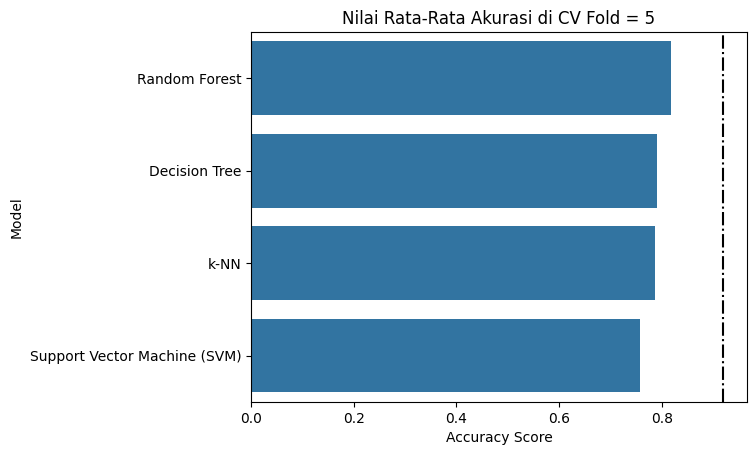

In [ ]:
# data rata-rata akurasi dan model
cv_means = [0.818605, 0.790698, 0.786047, 0.758140]
models = ["Random Forest",  "Decision Tree",  "k-NN", "Support Vector Machine (SVM)"]

# membuat DataFrame dari data
cv_results = pd.DataFrame({"Model": models, "CV-Means": cv_means})

# membuat bar plot
sns.barplot(data=cv_results.sort_values(by='CV-Means', ascending=False), x='CV-Means', y='Model', orient='h')

# menambah label dan judul
plt.xlabel('Accuracy Score')
plt.title('Nilai Rata-Rata Akurasi di CV Fold = 5')
plt.axvline(x = 0.92, color = 'black', linestyle = '-.');

plt.show()

Melalui grafik di atas, terbukti bahwa Random Forest memiliki akurasi yang cukup tinggi dan memiliki performa yang relatif robust di berbagai fold cross-validation. Yang berarti, model dapat menghasilkan hasil yang stabil atau dapat diandalkan.

## Implementasi Bootstrapping pada Model

### Random Forest

In [ ]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
import pandas as pd

# load the heart dataset
heart = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

# split the dataset into features and target variable
X = heart.drop(columns=['target'])  # Features
y = heart['target']  # Target variable

# split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# implement Bootstrapping
n_bootstraps = 10
bootstrapped_scores = []

for _ in range(n_bootstraps):
    bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    clf.fit(X_bootstrap, y_bootstrap)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bootstrapped_scores.append(acc)

print("Bootstrapped Scores:", bootstrapped_scores)
print("Average Bootstrapped Score:", np.mean(bootstrapped_scores))

Bootstrapped Scores: [0.9609756097560975, 0.9609756097560975, 0.9463414634146341, 0.926829268292683, 0.9317073170731708, 0.926829268292683, 0.9658536585365853, 0.9414634146341463, 0.9365853658536586, 0.926829268292683]
Average Bootstrapped Score: 0.9424390243902441


 Skor akurasi untuk setiap iterasi bootstrapping adalah adalah sekitar 0.94, yang menunjukkan bahwa model Random Forest memiliki kinerja sangat baik karena hampir mendekati sempurna dalam memprediksi data.

### Support Vector Machine (SVM)

In [ ]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import drive
import pandas as pd

# load the heart dataset
heart = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

# split the dataset into features and target variable
X = heart.drop(columns=['target'])  # Features
y = heart['target']  # Target variable

# split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a svm Classifier
clf = SVC(kernel='linear')

# implement Bootstrapping
n_bootstraps = 10
bootstrapped_scores = []

for _ in range(n_bootstraps):
    bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    clf.fit(X_bootstrap, y_bootstrap)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bootstrapped_scores.append(acc)

print("Bootstrapped Scores:", bootstrapped_scores)
print("Average Bootstrapped Score:", np.mean(bootstrapped_scores))

Bootstrapped Scores: [0.824390243902439, 0.7951219512195122, 0.7951219512195122, 0.7804878048780488, 0.7902439024390244, 0.7853658536585366, 0.8097560975609757, 0.8097560975609757, 0.7804878048780488, 0.7902439024390244]
Average Bootstrapped Score: 0.7960975609756098


Skor akurasi untuk setiap iterasi bootstrapping adalah adalah sekitar 0.79, yang menunjukkan bahwa model SVM memiliki kinerja yang baik dalam memprediksi data karena skor yang lumayan besar.

### Decision Tree

In [ ]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
import pandas as pd

# load the heart dataset
heart = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

# split the dataset into features and target variable
X = heart.drop(columns=['target'])  # Features
y = heart['target']  # Target variable

# split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# implement Bootstrapping
n_bootstraps = 10
bootstrapped_scores = []

for _ in range(n_bootstraps):
    bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    clf.fit(X_bootstrap, y_bootstrap)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bootstrapped_scores.append(acc)

print("Bootstrapped Scores:", bootstrapped_scores)
print("Average Bootstrapped Score:", np.mean(bootstrapped_scores))

Bootstrapped Scores: [0.9463414634146341, 0.9463414634146341, 0.9609756097560975, 0.9219512195121952, 0.9512195121951219, 0.9658536585365853, 0.9609756097560975, 0.9365853658536586, 0.9463414634146341, 0.9365853658536586]
Average Bootstrapped Score: 0.9473170731707317


Skor akurasi untuk setiap iterasi bootstrapping adalah adalah sekitar 0.94, yang menunjukkan bahwa model Decision Tree memiliki kinerja yang sangat baik dalam memprediksi data karena skor mendekati sempurna.

### k-NN

In [ ]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
import pandas as pd

# load the heart dataset
heart = pd.read_csv('/content/drive/MyDrive/dataset/heart.csv')

# split the dataset into features and target variable
X = heart.drop(columns=['target'])  # Features
y = heart['target']  # Target variable

# split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

# implement Bootstrapping
n_bootstraps = 10
bootstrapped_scores = []

for _ in range(n_bootstraps):
    bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    clf.fit(X_bootstrap, y_bootstrap)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bootstrapped_scores.append(acc)

print("Bootstrapped Scores:", bootstrapped_scores)
print("Average Bootstrapped Score:", np.mean(bootstrapped_scores))

Bootstrapped Scores: [0.775609756097561, 0.7463414634146341, 0.7268292682926829, 0.7268292682926829, 0.7463414634146341, 0.7853658536585366, 0.7463414634146341, 0.7560975609756098, 0.7463414634146341, 0.7902439024390244]
Average Bootstrapped Score: 0.7546341463414634


Skor akurasi untuk setiap iterasi bootstrapping adalah adalah sekitar 0.75, yang menunjukkan bahwa model k-NN memiliki kinerja yang baik dalam memprediksi data karena skor yang lumayan besar.

## Learning Curve

Learning Curve merupakan tahapan untuk melihat seberapa efisien model dalam "belajar" sehingga dapat memprediksi model dengan baik. Biasanya, semakin banyak data yang digunakan untuk belajar, maka nilai akurasi dari model tersebut juga akan makin tinggi.

Berikut ini adalah learning curve dari masing-masing model.

In [ ]:
# set train size
# 269 x 80% = 215 (20% for validation)
train_sizes = [1, 20, 50, 100, 150, 215]

In [ ]:
from sklearn.model_selection import learning_curve
def learn_curve_plot(estimator, x, y, cv, train_sizes):
  train_sizes, train_scores, validation_scores = learning_curve(estimator,X=X,y=y, train_sizes= train_sizes, cv=cv)
  train_scores_mean = train_scores.mean(axis=1)
  validation_scores_mean = validation_scores.mean(axis=1)

  #Print
  print('Mean training scores\n\n', pd.Series(train_scores_mean, index=train_sizes))
  print('\n', '-' * 20) # separator
  print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index=train_sizes))

  plt.style.use('seaborn')
  plt.plot(train_sizes, train_scores_mean, label = 'Training error')
  plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
  plt.ylabel('Accuracy', fontsize = 14)
  plt.xlabel('Training set size', fontsize = 14)
  plt.title('Learning Curve', fontsize = 18, y = 1.03)
  plt.legend()

### Random Forest

Mean training scores

 1      1.0
20     1.0
50     1.0
100    1.0
150    1.0
215    1.0
dtype: float64

 --------------------

Mean validation scores

 1      0.486829
20     0.783415
50     0.829268
100    0.848780
150    0.865366
215    0.883902
dtype: float64


<ipython-input-177-56c901d9ac24>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


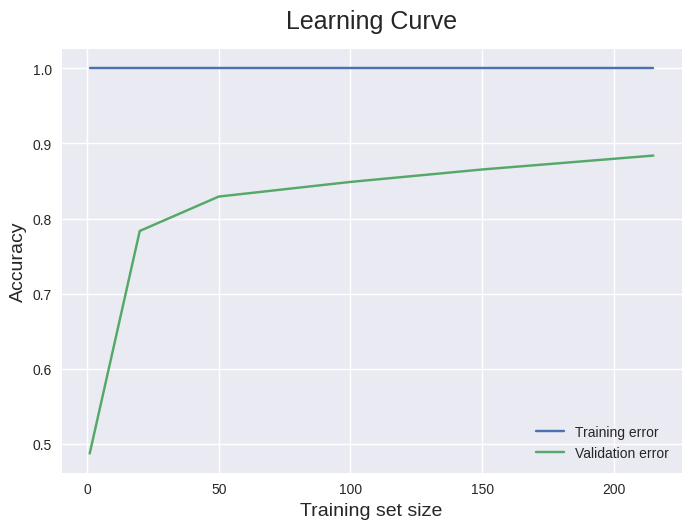

In [ ]:
learn_curve_plot(estimator=model1, x=X, y=y, cv=5, train_sizes=train_sizes)

Pada model Random Forest, dapat di lihat bahwa akurasi naik semakin tinggi di semakin banyak data yang dipelajari.

Gap dari training error dan validation error yang terlihat cukup besar (1.3 > 0.1), dimana yang berarti model ini memiliki variance yang relatif besar.

Jadi, model Random Forest ini termasuk dalam tipe learning curves **Over Fit** karena berdasarkan nilai mean training scores dan mean validation scores dimana total mean training scores adalah 6.0 sedangkan total mean validation scores adalah 4.7, sehingga gap antara training error dan validation error yang terlihat cukup besar yaitu 1.3. Hal ini menunjukkan bahwa model memperoleh skor yang sempurna pada data latih tetapi performa pada data validasi jauh lebih rendah, dimana model telah menghafal data latih dan tidak bisa menggeneralisasi dengan baik pada data baru, atau juga karena model terlalu kompleks atau bervariasi. Namun, jika dilihat dari kurva validasi yang terus naik, bisa jadi gap akan semakin mengecil seiring bertambahnya data baru dan bisa menjadi good fit karena kurva training relatif stabil.

### Support Vector Machine (SVM)

Mean training scores

 1           NaN
20     1.000000
50     0.904000
100    0.932000
150    0.889333
215    0.891163
dtype: float64

 --------------------

Mean validation scores

 1           NaN
20     0.729756
50     0.758049
100    0.828293
150    0.835122
215    0.840000
dtype: float64


<ipython-input-177-56c901d9ac24>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


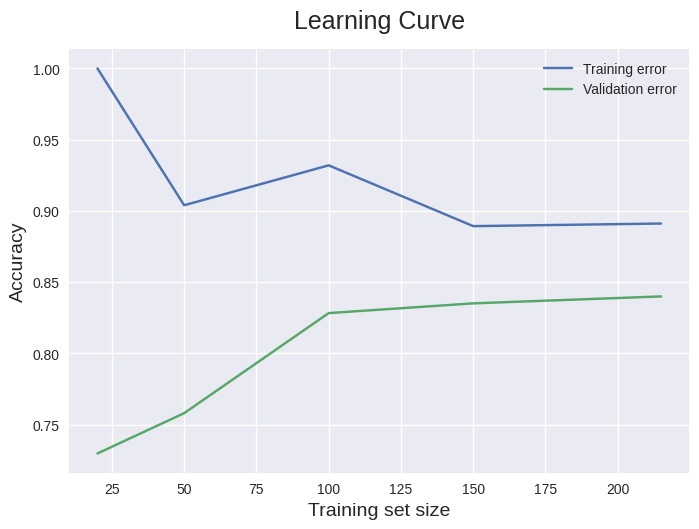

In [ ]:
learn_curve_plot(estimator=svm.SVC(kernel='linear'), x=X, y=y, cv=5, train_sizes=train_sizes)

Pada model SVM, dapat dilihat akurasi yang naik cukup signifikan di training set interval 0-200. Setelah itu, nilai yang naik cukup stabil di semakin banyak data yang dipelajari.

Gap dari training error dan validation error yang terlihat relatif cukup kecil (walaupun masih di sekitar 0.7 > 0.1) dibuktikan dari terdapat kurva training error yang turun di training set kedua di set 50 kemudian turun lagi di set 150, hal ini berarti bahwa model ini memiliki variance yang relatif sedang.

Jadi, model SVM ini termasuk dalam tipe learning curves **Over Fit** karena berdasarkan nilai mean training scores dan mean validation scores dimana total mean training scores adalah 4.7 sedangkan total mean validation scores adalah 4.0, walaupun gap antara training error dan validation error yang terlihat relatif kecil yaitu 0.7, namun masih menunjukkan 0.7 > 0.1. Hal ini menunjukkan bahwa model memperoleh skor yang sempurna pada data latih tetapi performa pada data validasi jauh lebih rendah, dimana model telah menghafal data latih dan tidak bisa menggeneralisasi dengan baik pada data baru.

### Decision Tree

Mean training scores

 1      1.000000
20     1.000000
50     0.984000
100    0.944000
150    0.914667
215    0.926512
dtype: float64

 --------------------

Mean validation scores

 1      0.486829
20     0.723902
50     0.718049
100    0.774634
150    0.770732
215    0.816585
dtype: float64


<ipython-input-177-56c901d9ac24>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


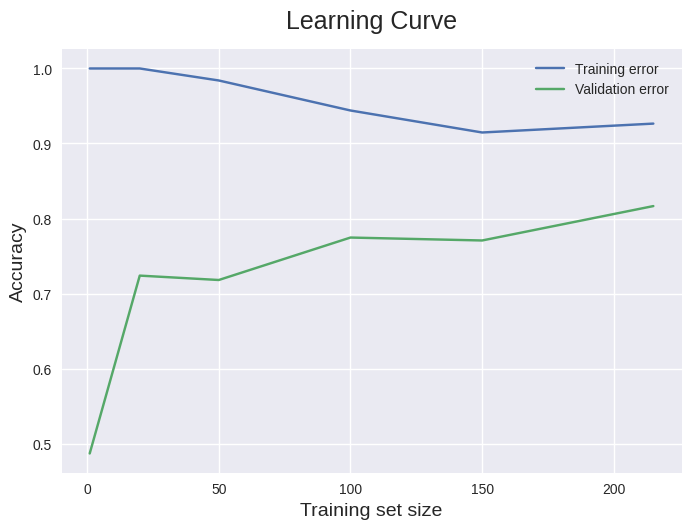

In [ ]:
learn_curve_plot(estimator=model3, x=X, y=y, cv=5, train_sizes=train_sizes)

Pada model Decision Tree, dapat dilihat akurasi naik semakin tinggi di semakin banyak data yang dipelajari.

Gap dari training error dan validation error yang terlihat cukup besar (1.5 > 0.1) dibuktikan dari terdapat kurva training error yang sempat turun di training set pertama kemudian naik lagi di set 150 semakin tinggi di semakin banyak data yang dipelajari, hal ini berarti bahwa model ini memiliki variance yang relatif besar.

Jadi, model Decision Tree ini termasuk dalam tipe learning curves **Over Fit** karena berdasarkan nilai mean training scores dan mean validation scores dimana total mean training scores adalah 5.8 sedangkan total mean validation scores adalah 4.3,  sedangkan gap antara training error dan validation error tinggi yaitu 1.5. Hal ini menunjukkan bahwa model memperoleh skor yang sempurna pada data latih tetapi performa pada data validasi jauh lebih rendah, dimana model telah menghafal data latih dan tidak bisa menggeneralisasi dengan baik pada data baru.

### k-NN

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 810, in kneighbors
    raise ValueError(
Val

Mean training scores

 1           NaN
20     0.730000
50     0.764000
100    0.776000
150    0.749333
215    0.728372
dtype: float64

 --------------------

Mean validation scores

 1           NaN
20     0.528780
50     0.626341
100    0.669268
150    0.652683
215    0.674146
dtype: float64


<ipython-input-177-56c901d9ac24>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


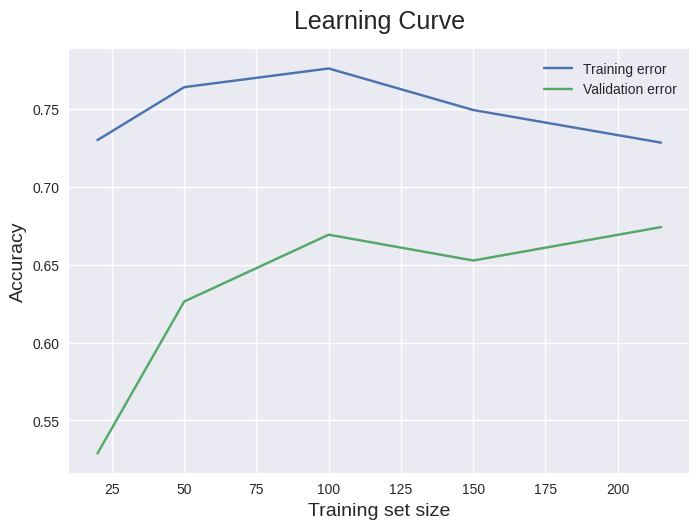

In [ ]:
learn_curve_plot(estimator=model4, x=X, y=y, cv=5, train_sizes=train_sizes)

Pada model k-NN, dapat dilihat akurasi yang naik cukup signifikan di training set interval 0-50. Setelah itu, nilai yang naik cukup stabil walaupuan sempat mengalami penurunan di data yang dipelajari.

Gap dari training error dan validation error yang terlihat relatif cukup kecil (walaupun masih di sekitar 0.5 > 0.1) dibuktikan dari terdapat kurva training error yang turun di training set 100 kemudian turun lagi di set 150, hal ini berarti bahwa model ini memiliki variance yang relatif banyak.

Jadi, model k-NN ini termasuk dalam tipe learning curves **Over Fit** karena berdasarkan nilai mean training scores dan mean validation scores dimana total mean training scores adalah 3.7 sedangkan total mean validation scores adalah 3.0, walaupun gap antara training error dan validation error yang terlihat relatif kecil yaitu 0.5, namun masih menunjukkan 0.5 > 0.1. Namun, kurva akurasi training terus menurun dengan bertambahnya iterasi. Jika dilihat dari kurva validasi yang terus naik dan kurva training yang terus turun, bisa jadi gap akan semakin mengecil seiring bertambahnya data baru dan bisa menjadi good fit karena gap akan < 0.1.

# **Model Comparison**

Model comparison adalah proses membandingkan kinerja beberapa model machine learning yang telah dipilih untuk menentukan model mana yang paling sesuai untuk digunakan dalam memecahkan masalah dari dataset heart disease.

Berikut ini adalah model comparison dari masing-masing model.

In [ ]:
# buat dataframe untuk compare beberapa model yang telah dibangun
import numpy as np

data = np.array([['','Accuracy', 'Precision', 'Recall', 'F1 Score'],
                ['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf],
                ['SVM', accuracy_svm, precision_svm, recall_svm, f1_svm],
                ['Decision Tree', accuracy_dt, precision_dt, recall_dt, f1_dt],
                ['k-NN', accuracy_knn, precision_knn, recall_knn, f1_knn]])

In [ ]:
data

array([['', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
       ['Random Forest', '0.8518518518518519', '0.9090909090909091',
        '0.8571428571428571', '0.8823529411764706'],
       ['SVM', '0.8888888888888888', '0.9393939393939394',
        '0.8857142857142857', '0.9117647058823529'],
       ['Decision Tree', '0.7592592592592593', '0.8055555555555556',
        '0.8285714285714286', '0.8169014084507044'],
       ['k-NN', '0.8888888888888888', '0.9393939393939394',
        '0.8857142857142857', '0.9117647058823529']], dtype='<U32')

In [ ]:
table = pd.DataFrame(data = data[1:, 1:],
                     index = data[1:,0],
                     columns = data[0,1:])

In [ ]:
table

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.8518518518518519,0.9090909090909091,0.8571428571428571,0.8823529411764706
SVM,0.8888888888888888,0.9393939393939394,0.8857142857142857,0.9117647058823529
Decision Tree,0.7592592592592593,0.8055555555555556,0.8285714285714286,0.8169014084507044
k-NN,0.8888888888888888,0.9393939393939394,0.8857142857142857,0.9117647058823529


Berdasarkan tabel comparison diatas, SVM memiliki nilai akurasi tertinggi (0.89) yang diikuti oleh k-NN dengan nilai yang sama (0.89), dan kemudian Random Forest (0.85). Namun, dalam hal presisi, recall, dan F1 score, SVM dan k-NN mendominasi dengan nilai tertinggi. Hal ini menunjukkan bahwa SVM dan k-NN mampu memberikan prediksi yang lebih baik secara keseluruhan, tidak hanya dalam hal memprediksi secara benar (akurasi), tetapi juga dalam hal mengklasifikasikan dengan tepat dan mengidentifikasi kelas target (apakah pasien sakit jantung atau tidak) dengan baik (presisi, recall, dan F1 score). Oleh karena itu, dalam kasus ini, SVM dan k-NN akan dipilih sebagai model yang lebih baik daripada Random Forest.

# **Hyperparameter Tuning**

Hyperparameter Tuning adalah serangkaian eksperimen untuk mengoptimasi suatu model dengan cara mengubah nilai hyperparameter dari suatu algoritma. Variabel dan algoritma model yang nilainya dapat diatur sebelum memulai training dan akan mempengaruhi proses training model.

Berikut ini adalah hyperparameter tuning dari masing-masing model.

In [ ]:
cv_tuned = []

def Model_Performance(model_name, model):

    print(model_name)
    print('-----------------------------------------')
    print('        Best Score: ', str(model.best_score_)) # best_score_: Mean cross-validated score of the best_estimator
    print('   Best Parameters: ', str(model.best_params_))

    arg_min = np.argmin(model.cv_results_['rank_test_score'])
    scores_list = []
    for i in ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']:
        scores_list.append(model.cv_results_[i][arg_min])

    cv_tuned.append({'Model': model_name,
                     'CV Scores': scores_list})

print ('Function ready!')

Function ready!


## Random Forest

Pada Random Forest, parameter yang akan kita tuning adalah sebagai berikut :
* max_features = auto
* max_depth = 80, 90, 100, 110, 120
* min_samples_split = 8, 10, 12
* min_samples_leaf = 3, 4, 5
* bootstrap = True, False
* n_estimators = 100, 200, 300, 1000

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=random_state)

param_grid = {'max_features': ['auto'],
              'max_depth': [80, 90, 100, 110, 120],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [3, 4, 5],
              'bootstrap': [True, False],
              'n_estimators': [100, 200, 300, 1000]}

tuned_rf = RandomizedSearchCV(rf, param_grid, cv = 5,
                        scoring = 'accuracy', verbose = True, n_jobs = -1)
best_tuned_rf = tuned_rf.fit(X_train, y_train)
Model_Performance('RandomForest Classifier', best_tuned_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForest Classifier
-----------------------------------------
        Best Score:  0.9670731707317073
   Best Parameters:  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': False}


Dari hasil proses Hyperparameter Tuning di atas, telah didapatkan model **Random Forest** terbaik yang mendapatkan skor akurasi lebih tinggi daripada skor akurasi model, dengan base parameter melalui proses Hyperparameter Tuning.

Dengan **RandomizedSearchCV**, diperoleh model dengan parameter-parameter yang telah ditentukan hingga mendapatkan nilai akurasi sebesar  **0.9670= 96.7%** .

Nilai akurasi tersebut terbilang tinggi. Jadi, dapat disimpulkan bahwa model tersebut layak digunakan untuk memodelkan data.

## Support Vector Machine (SVM)

Pada Support Vector Machine (SVM), parameter yang akan kita tuning adalah sebagai berikut :
* C = 0.1, 1, 10, 100
* gamma = 0.001, 0.01, 0.1, 1
* kernel = linear

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100], # regularisasi parameter
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear']
              }

# inisialisasi model SVC
svm = SVC()

tuned_svm = RandomizedSearchCV(svm, param_distributions=param_grid, cv=5,
                               scoring='accuracy', verbose=1, n_jobs=-1)
best_tuned_svm = tuned_svm.fit(X_train, y_train)
Model_Performance('SVM', best_tuned_svm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM
-----------------------------------------
        Best Score:  0.8512195121951219
   Best Parameters:  {'kernel': 'linear', 'gamma': 1, 'C': 0.1}


Dari hasil proses Hyperparameter Tuning di atas, telah didapatkan model **SVM** yang mendapatkan skor akurasi lebih kecil daripada skor akurasi model, dengan base parameter melalui proses Hyperparameter Tuning.

Dengan **RandomizedSearchCV**, diperoleh model dengan parameter-parameter yang telah ditentukan hingga mendapatkan nilai akurasi sebesar **0.8512** = **85.12%** .

Nilai akurasi tersebut terbilang cukup tinggi. Jadi, dapat disimpulkan bahwa model tersebut layak digunakan untuk memodelkan data.

## Decision Tree

Pada Decision Tree, parameter yang akan kita tuning adalah sebagai berikut :
* criterion = gini, entropy
* max_depth = None, 10, 20, 30, 40, 50
* min_samples_split = 2, 5, 10
* min_samples_leaf = 1, 2, 4
* max_features = auto, sqrt, log2, None

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2', None]
              }

# inisialisasi objek DecisionTreeClassifier
dt = DecisionTreeClassifier()

# tuning parameter dengan menggunakan RandomizedSearchCV
tuned_dt = RandomizedSearchCV(dt, param_distributions=param_grid, cv=5,
                              scoring='accuracy', verbose=True, n_jobs=-1)

best_tuned_dt = tuned_dt.fit(X_train, y_train)
Model_Performance('DecisionTree Classifier', best_tuned_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
DecisionTree Classifier
-----------------------------------------
        Best Score:  0.9670731707317074
   Best Parameters:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}


Dari hasil proses Hyperparameter Tuning di atas, telah didapatkan model **Decision Tree** terbaik yang mendapatkan skor akurasi lebih tinggi daripada skor akurasi model, dengan base parameter melalui proses Hyperparameter Tuning.

Dengan **RandomizedSearchCV**, diperoleh model dengan parameter-parameter yang telah ditentukan hingga mendapatkan nilai akurasi sebesar **0.9670** = **96.7%**.

Nilai akurasi tersebut terbilang tinggi. Jadi, dapat disimpulkan bahwa model tersebut layak digunakan untuk memodelkan data.

## k-NN

Pada k-NN, parameter yang akan kita tuning adalah sebagai berikut :
* n_neighbors = range 1, 21
* weights = uniform, distance  
* p = 1, 2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
              'n_neighbors': range(1, 21),  # jumlah tetangga yang akan dipertimbangkan
              'weights': ['uniform', 'distance'],  # metode penimbangan untuk prediksi
              'p': [1, 2]  # metrik jarak: 1 untuk Manhattan, 2 untuk Euclidean
              }

# inisialisasi model k-NN
knn = KNeighborsClassifier()

# inisialisasi objek RandomizedSearchCV
tuned_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=100,
                                   scoring='accuracy', cv=5, verbose=1, random_state=random_state, n_jobs=-1)

best_tuned_knn = tuned_knn.fit(X_train, y_train)
Model_Performance('KNeighbors Classifier', best_tuned_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 80 candidates, totalling 400 fits
KNeighbors Classifier
-----------------------------------------
        Best Score:  0.9719512195121951
   Best Parameters:  {'weights': 'uniform', 'p': 1, 'n_neighbors': 1}


Dari hasil proses Hyperparameter Tuning di atas, telah didapatkan model **k-NN** terbaik yang mendapatkan skor akurasi lebih tinggi daripada skor akurasi model, dengan base parameter melalui proses Hyperparameter Tuning.

Dengan **RandomizedSearchCV**, diperoleh model dengan parameter-parameter yang telah ditentukan hingga mendapatkan nilai akurasi sebesar **0.9719** = **97.19**% .

Nilai akurasi tersebut terbilang tinggi. Jadi, dapat disimpulkan bahwa model tersebut layak digunakan untuk memodelkan data.

# **Conclusion & Recommendation**

**Summary**

Setelah melakukan eksplorasi dan evaluasi terhadap beberapa model machine learning yang telah saya pilih pada dataset heart disease dengan 10 fitur dan 269 sampel pasien penyakit jantung, saya menyimpulkan bahwa ***best model*** yang saya pilih adalah **k-NN** karena mampu menghasilkan performa terbaik dalam mengatasi masalah yang di hadapi yaitu masalah dalam mengklasifikasikan apakah seorang pasien sakit jantung atau tidak. k-NN mampu memprediksi kasus heart disease dengan akurasi model 89%, dimana hanya terdapat 6 kesalahan dalam prediksi, yaitu 2 kesalahan dalam pengklasifikasian pasien yang tidak mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien mengalami penyakit jantung atau sakit jantung (False Positive), dan 4 kesalahan dalam pengklasifikasian pasien yang mengidap penyakit jantung, tetapi dalam keadaan sebenarnya pasien tidak mengalami sakit jantung (False Negative). Kesalahan yang sedikit ini sangat penting dalam suatu model karena artinya model mampu memprediksi masalah dengan tingkat akurasi yang tinggi. Oleh karena itu, model k-NN berhasil mengklasifikasikan 89% pasien yang terkena penyakit jantung dengan benar. k-NN ini juga memiliki kemampuan yang baik untuk menangani dataset yang kompleks dan tidak linier. Sehingga hal ini sangat cocok dengan dataset heart disease yang mana memiliki fitur yang rumit atau hubungan yang kompleks antara fitur dan target.

Dilihat pada learning curve, kurva validasi dari k-NN yang terus naik dan kurva training yang terus turun, bisa jadi membuat gap akan semakin mengecil seiring bertambahnya data baru dan bisa menjadi good fit walaupun saat ini terindikasi over fit. Berdasarkan tabel comparison, k-NN memiliki nilai akurasi tertinggi yaitu 89% dibandingkan model lain dalam memprediksi kasus heart disease, hal ini menunjukkan bahwa k-NN mampu memberikan prediksi yang lebih baik secara keseluruhan, tidak hanya dalam hal memprediksi secara akurasi tetapi juga dalam hal mengklasifikasikan dengan tepat dan mengidentifikasi kelas target (apakah pasien sakit jantung atau tidak) dengan baik (presisi, recall, dan F1 score). Dilihat dari hyperparameter tuning dengan RandomizedSearchCV, k-NN mendapatkan nilai akurasi sebesar 97.19%, yang artinya nilai akurasi tersebut terbilang tinggi dan layak digunakan untuk memodelkan data. Akurasi sebesar 97.19% menunjukkan bahwa model k-NN sangat baik dalam memprediksi apakah seseorang mengidap penyakit jantung atau tidak, dan model k-NN juga dapat mengklasifikasikan sebagian besar kasus dengan benar, sehingga sangat berguna dalam mendukung proses diagnosis dan pengobatan pada pasien penyakit jantung. Dengan akurasi sebesar 97.19%, model k-NN dapat membantu dokter dan tenaga medis dalam mengidentifikasi pasien yang berisiko terkena penyakit jantung dengan lebih akurat, sehingga tindakan pencegahan dapat dilakukan lebih dini.

**Recommendation**

Walaupun model k-NN memiliki tingkat akurasi yang tinggi dan mampu memprediksi serta mengklasifikasikan kasus seseorang terkena penyakit jantung atau tidak dengan sangat baik, namun masih ada beberapa kekurangan dari model k-NN ini. Seperti pada pengimplementasian Cross Validation dan Bootstrapping, model k-NN masih mendapatkan skor yang kecil dibandingkan dengan model lainnya. Selain itu, model juga terindikasi over fit yang artinya model k-NN terlalu pintar dalam membuat pola dan tentu saja hal ini tidak bagus untuk memprediksi kasus penyakit jantung karena nantinya dapat menimbulkan kesalahan yang fatal dalam hal penangan. Hal ini menunjukkan bahwa dengan pencapaian akurasi dan klasifikasi yang luar biasa, model k-NN juga dapat membuat suatu kesalahan. Oleh karena itu, penting untuk diingat bahwa model machine learning ini harus digunakan sebagai alat bantu bagi profesional medis, bukan sebagai pengganti. Konsultasi dan evaluasi hasil prediksi dari model k-NN ini dengan dokter atau ahli medis untuk hasil evaluasi yang lebih komprehensif dan supaya mendapatkan penanganan yang sesuai sangat perlu. Sehingga dapat dipastikan bahwa penggunaan model machine learning k-NN sebagai alat bantu bagi profesional medis merupakan model yang aman dan efektif dalam membantu dunia profesional medis atau dunia kesehatan.






